# Breast Cancer Prediction Using Machine Learning

This comprehensive notebook demonstrates the application of various machine learning techniques for predicting breast cancer diagnosis based on cell recording data. We'll explore the dataset, preprocess the data, implement multiple ML algorithms, and evaluate their performance to build an accurate predictive model.

## Background
Breast cancer is a disease characterized by the uncontrolled growth of abnormal cells in the breast tissue. These cells can form a mass, often referred to as a tumor. Tumors can be classified as either benign or malignant. A benign mass is non-cancerous, meaning its cells do not spread to other parts of the body and are typically not life-threatening. In contrast, a malignant mass is cancerous; its cells have the ability to invade surrounding tissues and metastasize, or spread, to distant organs through the bloodstream or lymphatic system.

Building an AI predictive system for breast cancer diagnosis is crucial for several reasons. Firstly, it can significantly enhance the accuracy and speed of diagnosis, potentially catching the disease at earlier, more treatable stages. This can lead to better patient outcomes and increased survival rates. Secondly, an AI system can help reduce the burden on medical professionals by automating preliminary analyses of medical images (like mammograms) and patient data, allowing doctors to focus on more complex cases and patient interaction. Lastly, AI can identify subtle patterns and risk factors that might be missed by the human eye, offering a more comprehensive and personalized risk assessment for each patient, ultimately leading to more informed treatment decisions.

In detecting breast cancer at an early stage, some techniques are employed by medical practitioners such as surgical biopsy, Fine Needle Aspiration is a form of biopsy with visual interpretation with 65% to 98% correctness


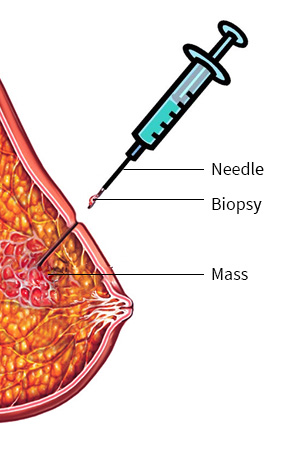


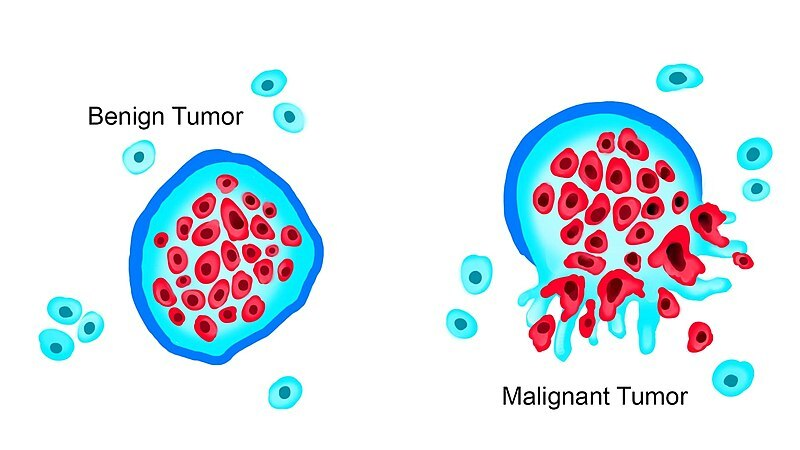

## Dataset

### Data Source and Collection
The dataset used in this notebook is the Breast Cancer Wisconsin (Diagnostic) dataset, originally created by Dr. William H. Wolberg, W. Nick Street, and Olvi L. Mangasarian at the University of Wisconsin-Madison. This dataset is widely recognized in the machine learning community and is available through the UCI Machine Learning Repository and scikit-learn's built-in datasets.

### Clinical Context
The data contains features computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. Fine needle aspiration is a type of biopsy procedure where a thin needle is used to extract a small sample of tissue from a lump or mass in the breast. Pathologists then examine these samples under a microscope to determine if cancer cells are present.


### Dataset Characteristics
- **Total Instances**: 569 cases
- **Features**: 32 variables (30 real-valued features + ID + diagnosis)
- **Target Variable**: Binary classification (Malignant vs Benign)
- **Missing Values**: None
- **Class Distribution**: Approximately 63% benign, 37% malignant (357 benign, 212 malignant)
- **Data Type**: Numerical

### Feature Categories
The dataset includes 32 variables, representing various characteristics of the cell nuclei present in the images:

- **1) ID number** - Unique identifier for each sample
- **2) Diagnosis** - Target variable (M = malignant, B = benign)
- **3-32) Cell Nucleus Measurements** - 30 real-valued features

### Core Cell Nucleus Features
Ten real-valued features are computed for each cell nucleus:

**Core Cell Nucleus Properties:**
1. **Radius** - Size of the nucleus from center to perimeter
2. **Texture** - Variation in grayscale values (surface roughness)
3. **Perimeter** - Length of the nuclear boundary
4. **Area** - Overall size of the nuclear region
5. **Smoothness** - Local variations in radius lengths
6. **Compactness** - Shape density (perimeter² / area - 1.0)
7. **Concavity** - Severity of indentations in the nuclear contour
8. **Concave Points** - Number of significant indentations
9. **Symmetry** - How symmetrical the nucleus appears
10. **Fractal Dimension** - Complexity of the nuclear boundary

**Statistical Measures (for each core property):**
For each of the 10 core features, three statistical measures are computed:

- **Mean:** Average value across all cells in the sample
- **Standard Error (SE):** Standard error of the mean
- **Worst** - Mean of the three largest values (most severe, provides a strong indicator of the presence of exceptionally large or atypical cells, which is a common characteristic of malignant tumors)

This results in 30 features total (10 core features × 3 statistics). For example:
- Field 3: Mean Radius
- Field 13: Radius Standard Error
- Field 23: Worst Radius


### Clinical Relevance
These measurements are clinically significant because:

- **Size-related features** (radius, perimeter, area) often indicate tumor aggressiveness
- **Shape features** (smoothness, compactness, symmetry) reveal cellular organization
- **Texture features** reflect cellular heterogeneity and nuclear irregularity
- **Concavity measures** indicate nuclear membrane irregularities
- **Fractal dimension** captures complexity of nuclear boundaries

Malignant cells typically exhibit:
- Larger size and irregular shape
- Higher texture variation
- Increased concavity and asymmetry
- More complex nuclear boundaries

### Data Quality and Preprocessing
- All measurements are standardized and normalized
- No missing values in the original dataset
- Features are continuous numerical values
- Data has been validated through clinical correlation

This comprehensive dataset provides an excellent foundation for developing machine learning models that can assist in breast cancer diagnosis by analyzing cellular characteristics from FNA samples.

## REMOVE THIS SECTION

### Feature Importance for Diagnosis

**High Predictive Value:**
- Worst-case measurements (most severe values)
- Concavity and concave points (structural irregularities)
- Size-related features (radius, area, perimeter)
- Texture variations (cellular organization)

**Moderate Predictive Value:**
- Symmetry and smoothness measures
- Compactness ratios
- Standard error values (population variability)

**Clinical Interpretation:**
The combination of multiple abnormal measurements provides stronger evidence for malignancy than any single feature alone. Machine learning models excel at identifying complex patterns across all these measurements simultaneously.



LDA ON TEST DATA- CHECK FOR NEW ENTRIES

-------------------------------------------------------------------------------------------------------------

## Project outline
This notebook covers the following steps:
1. **Data Loading**: Import necessary libraries and load the dataset.
2. **Data Exploration**: Understand the dataset structure, check for missing values, and visualize data distributions.
3. **Data Preprocessing**: Handle missing values, encode categorical variables, and scale features.
4. **Model Training**: Implement various machine learning algorithms including Logistic Regression, Decision Trees, Random Forests, and Support Vector Machines.
5. **Model Evaluation**: Evaluate model performance using accuracy, precision, recall, and F1-score.
6. **Hyperparameter Tuning**: Optimize model parameters using Grid Search.
7. **Final Model Selection**: Choose the best-performing model based on evaluation metrics.


## 1. Import Required Libraries

Import essential libraries including pandas, numpy, scikit-learn, matplotlib, seaborn, and other ML libraries needed for data analysis and modeling.

In [1]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from plotly import express as px
import plotly.graph_objects as go

# Machine Learning libraries
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif, RFE, SelectFromModel
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

# Feature importance analysis
import shap
from sklearn.inspection import permutation_importance

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

print("All libraries imported successfully!")

All libraries imported successfully!


## 2. Load and Explore the Dataset

Load the breast cancer dataset from the 'data' file path, examine its structure, dimensions, column names, data types, and basic statistics.

In [3]:
# Load the dataset
# Assuming the dataset is in CSV format in the data directory
df = pd.read_csv('/Users/amelchoudary/Desktop/git/breast-cancer/data/data.csv')
print("Dataset loaded successfully!")
# Could havve set index_col=0 but we wanted to drop 'id' column later, and keep an incremental index

# drop Unnamed: 32 column, as it is not useful
if 'Unnamed: 32' in df.columns:
    df.drop(columns=['Unnamed: 32'], inplace=True)

# Display basic information about the dataset
print(f"\nDataset Shape: {df.shape}")
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

Dataset loaded successfully!

Dataset Shape: (569, 32)
Number of rows: 569
Number of columns: 32


In [4]:
# Display first 5 rows of the dataset
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
# Display column names and data types
print("Column names and data types:")
print(df.dtypes)

Column names and data types:
id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst         

In [6]:
# Display basic statistics
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [7]:
# Display absic statistics for categorical columns
df.select_dtypes(include=['object', 'category']).describe()

,diagnosis
count,569
unique,2
top,B
freq,357


In [8]:
# Check for missing values
print(f"\nMissing values in the dataset: {df.isnull().sum().sum()}")


Missing values in the dataset: 0


## 3. Data Preprocessing and Cleaning

There are no missing values to handle, so we goon by checking for duplicate rows, then we remove unnecessary columns (like ID), encode categorical variables (diagnosis), and check for data quality issues.

In [9]:
# Check for duplicate rows
print(f"Number of duplicate rows: {df.duplicated().sum()}")

# Remove duplicate rows if any
if df.duplicated().sum() > 0:
    df = df.drop_duplicates()
    print("Duplicate rows removed!")

Number of duplicate rows: 0


In [10]:
# Remove unnecessary columns (ID column if present)
columns_to_drop = []
for col in df.columns:
    if 'id' in col.lower() or 'unnamed' in col.lower():
        columns_to_drop.append(col)

if columns_to_drop:
    df = df.drop(columns=columns_to_drop)
    print(f"Dropped columns: {columns_to_drop}")

Dropped columns: ['id']


In [11]:
# Handle target variable encoding
# Encode the 'diagnosis' column
if df['diagnosis'].dtype == 'object':
    # Encode categorical diagnosis (M=1, B=0)
    le = {'M' : 1, 'B': 0}
    df['diagnosis'] = df['diagnosis'].map(le)

In [12]:
# Check for outliers using IQR method
def detect_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Check outliers for numerical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns
outlier_counts = {}
malignant_outlier_counts = {}

print("Outlier Analysis by Feature:")
print("=" * 80)

for col in numerical_cols:
    if col != 'diagnosis':
        outliers_df = detect_outliers(df, col)
        total_outliers = len(outliers_df)
        malignant_outliers = len(outliers_df[outliers_df['diagnosis'] == 1])
        
        outlier_counts[col] = total_outliers
        malignant_outlier_counts[col] = malignant_outliers
        
        if total_outliers > 0:
            malignant_percentage = (malignant_outliers / total_outliers) * 100
            print(f"{col}:")
            print(f"  Total outliers: {total_outliers}")
            print(f"  Malignant outliers: {malignant_outliers} ({malignant_percentage:.1f}%)")
            print(f"  Benign outliers: {total_outliers - malignant_outliers} ({100 - malignant_percentage:.1f}%)")

Outlier Analysis by Feature:
radius_mean:
  Total outliers: 14
  Malignant outliers: 14 (100.0%)
  Benign outliers: 0 (0.0%)
texture_mean:
  Total outliers: 7
  Malignant outliers: 5 (71.4%)
  Benign outliers: 2 (28.6%)
perimeter_mean:
  Total outliers: 13
  Malignant outliers: 13 (100.0%)
  Benign outliers: 0 (0.0%)
area_mean:
  Total outliers: 25
  Malignant outliers: 25 (100.0%)
  Benign outliers: 0 (0.0%)
smoothness_mean:
  Total outliers: 6
  Malignant outliers: 3 (50.0%)
  Benign outliers: 3 (50.0%)
compactness_mean:
  Total outliers: 16
  Malignant outliers: 16 (100.0%)
  Benign outliers: 0 (0.0%)
concavity_mean:
  Total outliers: 18
  Malignant outliers: 15 (83.3%)
  Benign outliers: 3 (16.7%)
concave points_mean:
  Total outliers: 10
  Malignant outliers: 10 (100.0%)
  Benign outliers: 0 (0.0%)
symmetry_mean:
  Total outliers: 15
  Malignant outliers: 9 (60.0%)
  Benign outliers: 6 (40.0%)
fractal_dimension_mean:
  Total outliers: 15
  Malignant outliers: 5 (33.3%)
  Benign ou

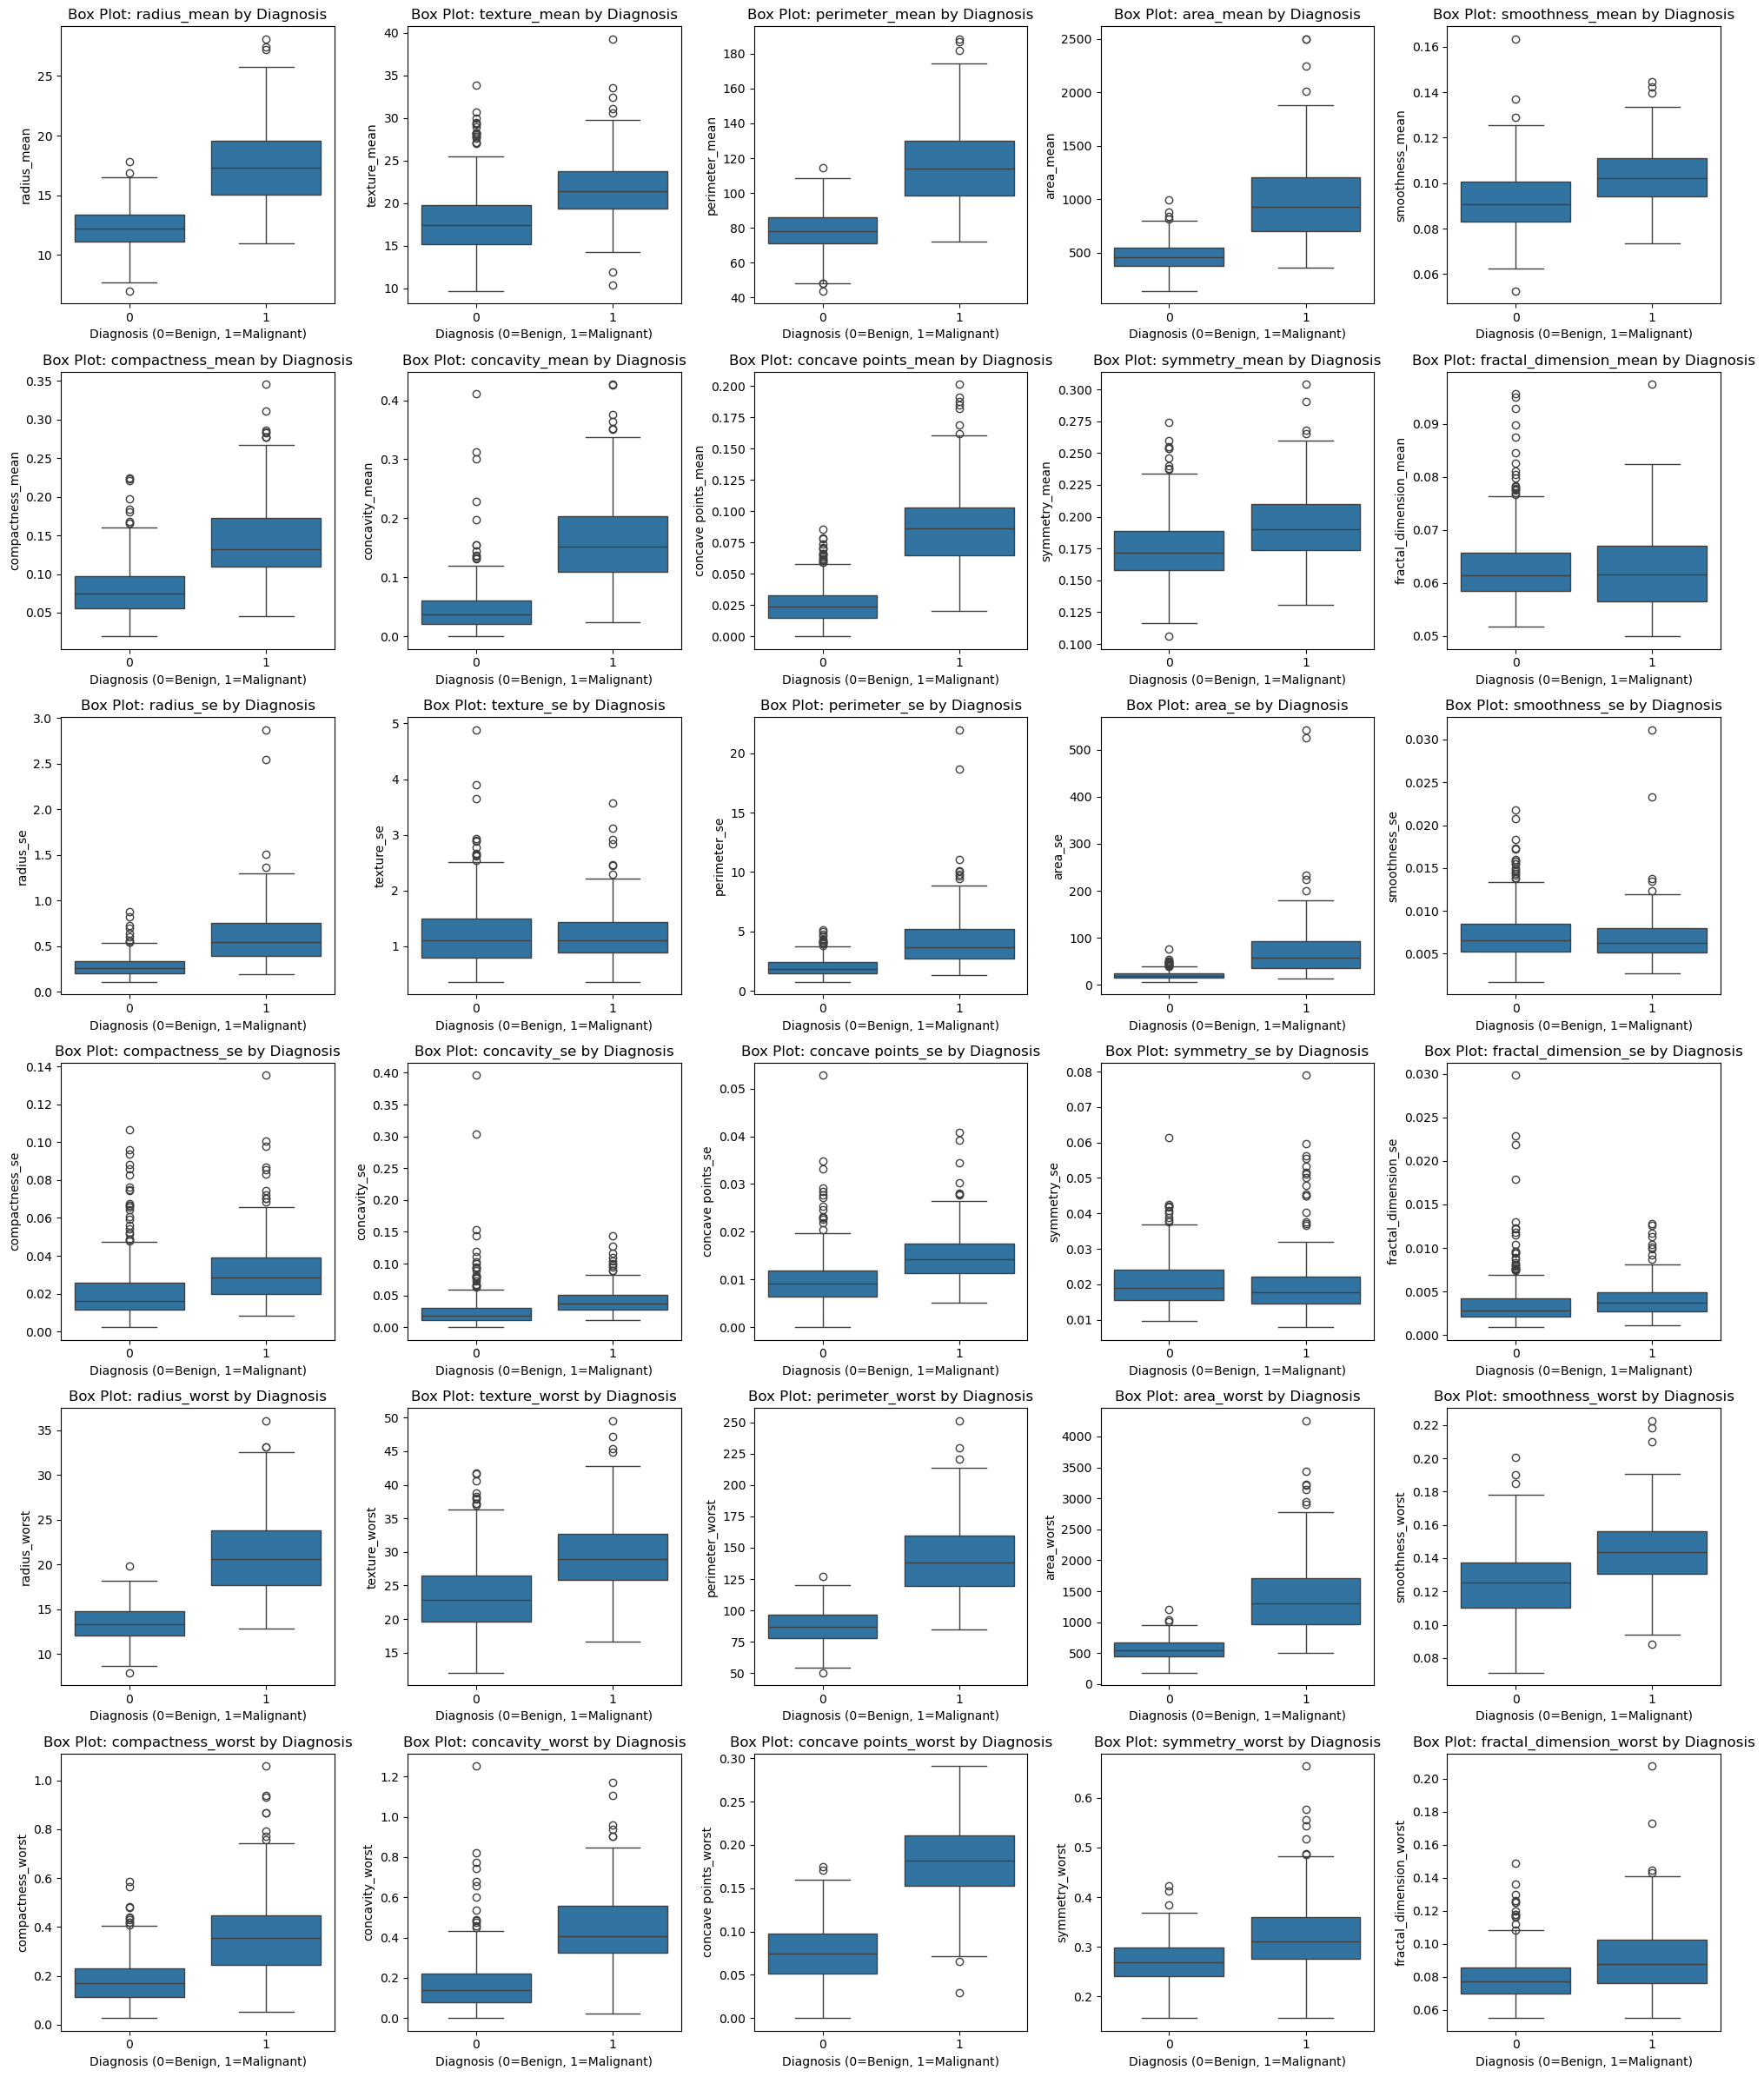

In [13]:
# Box plots for all features (except diagnosis) by diagnosis
# Get all numerical features except diagnosis
all_features = [col for col in numerical_cols if col != 'diagnosis']

# Create box plots for all features
n_features = len(all_features)
n_cols = 5
n_rows = (n_features + n_cols - 1) // n_cols  # Calculate number of rows needed

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 4 * n_rows))
axes = axes.ravel()

for i, feature in enumerate(all_features):
    if feature in df.columns:
        sns.boxplot(data=df, x='diagnosis', y=feature, ax=axes[i])
        axes[i].set_title(f'Box Plot: {feature} by Diagnosis')
        axes[i].set_xlabel('Diagnosis (0=Benign, 1=Malignant)')

# Remove empty subplots if any
for j in range(i + 1, len(axes)):
    axes[j].remove()

plt.subplots_adjust(hspace=0.4, wspace=0.3)
plt.tight_layout()
plt.show()

## 4. Exploratory Data Analysis and Visualization

Create visualizations to understand data distribution, correlation between features, class imbalance, and relationships between different cell measurement features.

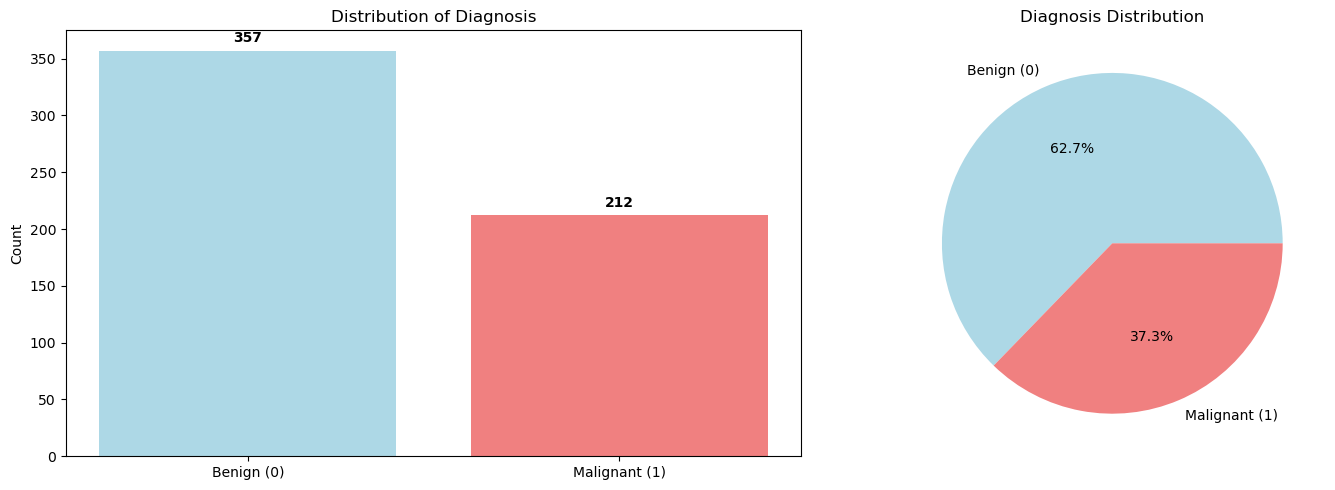

In [14]:
# Set up the plotting style
plt.style.use('default')
sns.set_palette("husl")

# Create subplots for class distribution
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Bar plot for class distribution
if 'diagnosis' in df.columns:
    diagnosis_counts = df['diagnosis'].value_counts()
    bars = axes[0].bar(['Benign (0)', 'Malignant (1)'], diagnosis_counts.values, color=['lightblue', 'lightcoral'])
    axes[0].set_title('Distribution of Diagnosis')
    axes[0].set_ylabel('Count')
    
    # Add count labels on bars
    for bar, count in zip(bars, diagnosis_counts.values):
        axes[0].text(bar.get_x() + bar.get_width()/2., bar.get_height() + 5,
                    f'{count}', ha='center', va='bottom', fontweight='bold')
    
    # Pie chart for class distribution
    axes[1].pie(diagnosis_counts.values, labels=['Benign (0)', 'Malignant (1)'], 
                autopct='%1.1f%%', colors=['lightblue', 'lightcoral'])
    axes[1].set_title('Diagnosis Distribution')

plt.tight_layout()
plt.show()

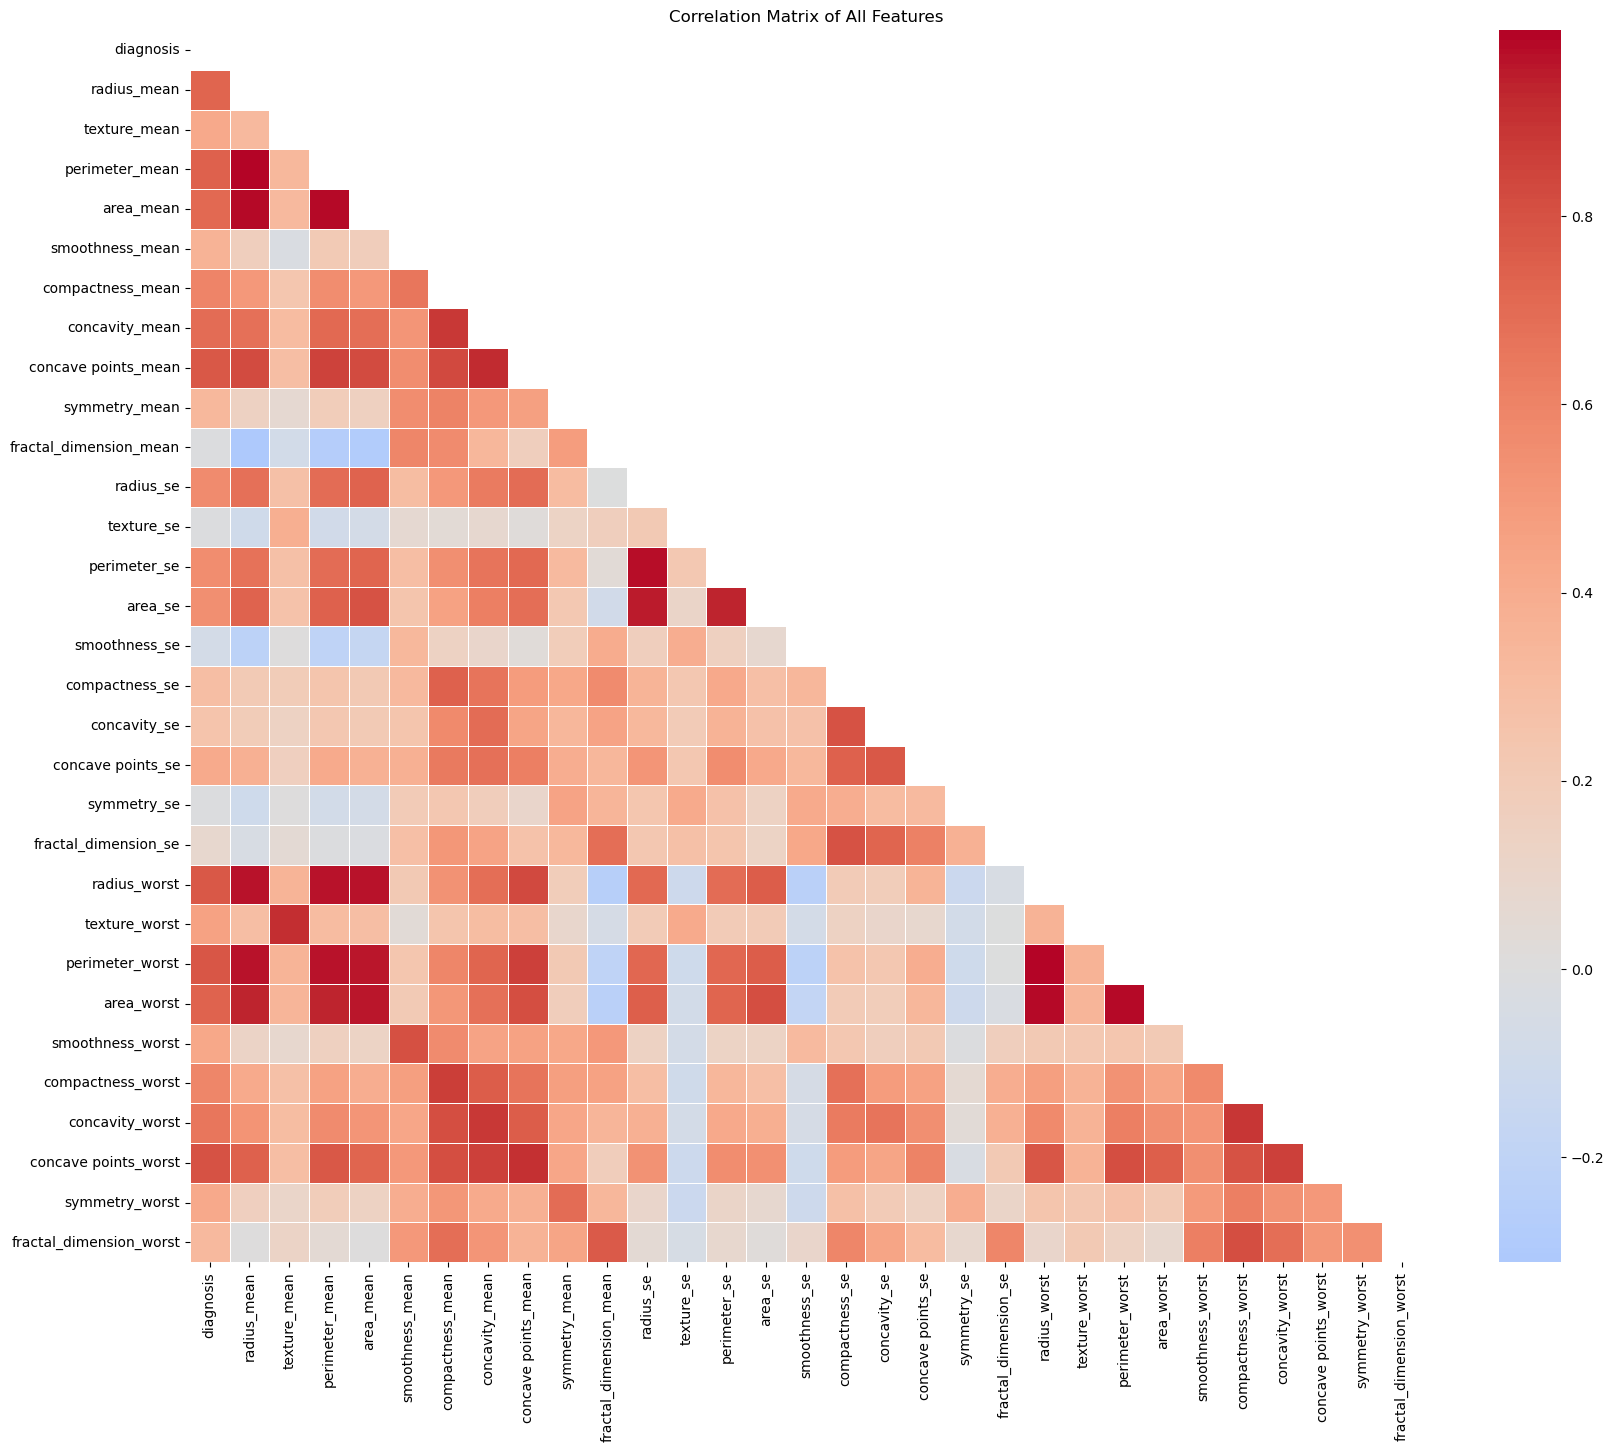

In [15]:
# Correlation matrix heatmap
plt.figure(figsize=(20, 16))
correlation_matrix = df.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5, mask=mask)
plt.title('Correlation Matrix of All Features')
plt.show()

In [16]:
# Features with high correlation with the target variable
high_corr_features = correlation_matrix.index[abs(correlation_matrix['diagnosis']) > 0.5]
print("\nFeatures with high correlation with the target variable:")
for feature in high_corr_features:
    if feature != 'diagnosis':
        print(f"{feature}: {correlation_matrix['diagnosis'][feature]:.2f}")


Features with high correlation with the target variable:
radius_mean: 0.73
perimeter_mean: 0.74
area_mean: 0.71
compactness_mean: 0.60
concavity_mean: 0.70
concave points_mean: 0.78
radius_se: 0.57
perimeter_se: 0.56
area_se: 0.55
radius_worst: 0.78
perimeter_worst: 0.78
area_worst: 0.73
compactness_worst: 0.59
concavity_worst: 0.66
concave points_worst: 0.79


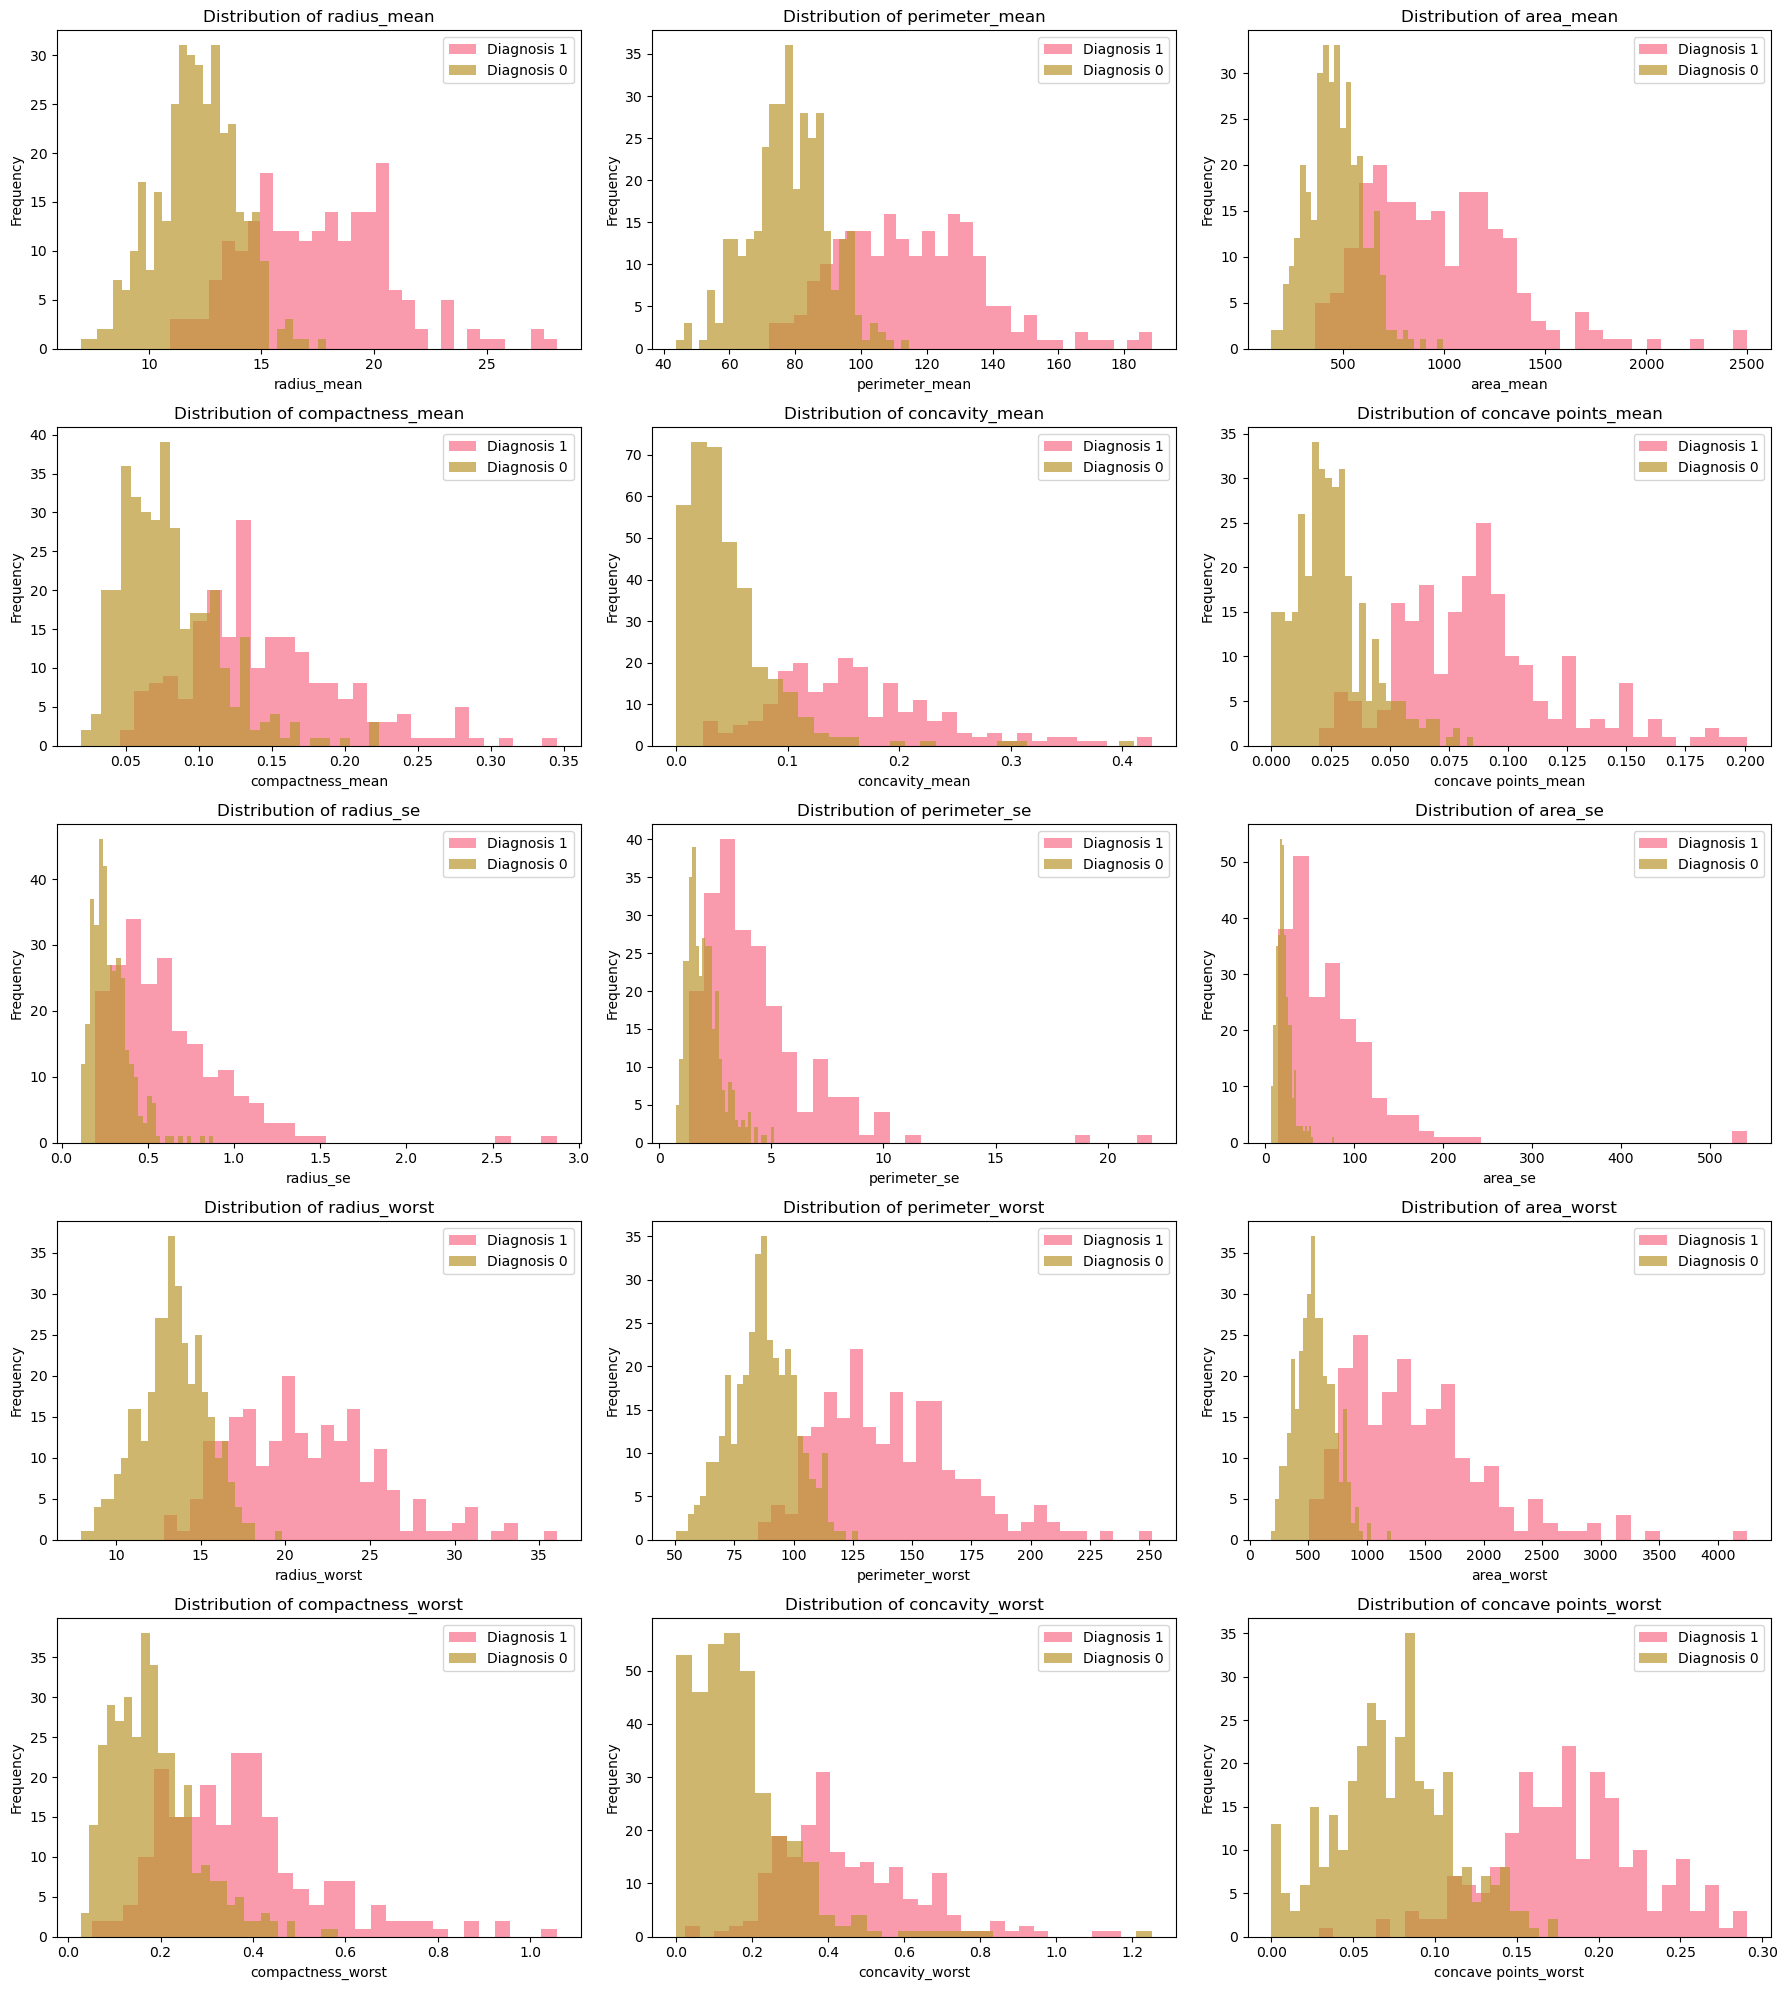

In [17]:
# Plotting distributions of the 15 features with high correlation with the target variable
fig, axes = plt.subplots(5, 3, figsize=(18, 20))
axes = axes.ravel()

features = [f for f in high_corr_features if f != 'diagnosis']

for i, feature in enumerate(features):
    if feature in df.columns:
        for diagnosis in df['diagnosis'].unique():
            subset = df[df['diagnosis'] == diagnosis]
            axes[i].hist(subset[feature], alpha=0.7, 
                        label=f'Diagnosis {diagnosis}', bins=30)
        axes[i].set_title(f'Distribution of {feature}')
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel('Frequency')
        axes[i].legend()

# Adjust layout with increased vertical spacing
plt.subplots_adjust(hspace=0.6, wspace=0.3)
plt.tight_layout()
plt.show()

## 5. Feature Selection and Engineering

Implement feature selection techniques using correlation analysis, univariate selection, recursive feature elimination, and feature importance to identify the most predictive features.

In [18]:
# Prepare features and target
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"Feature names: {list(X.columns)}")

Features shape: (569, 30)
Target shape: (569,)
Feature names: ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


In [19]:
# Step 1: Comprehensive Correlation Analysis
print("=" * 60)
print("STEP 1: CORRELATION ANALYSIS")
print("=" * 60)

# Calculate correlation matrix
# 1. Correlation-based feature selection
# Itentify highly correlated features (redundant) to prevent multicollinearity 
# reduce model complexity without losing predictive power
# Many cell measurements are naturally related (e.g., radius, perimeter, and area)
# Highly correlated features provide similar information
correlation_matrix = X.corr().abs()

# Find highly correlated feature groups
def find_correlated_groups(corr_matrix, threshold=0.80):
    """Find groups of highly correlated features"""
    groups = []
    processed = set()
    
    for i, feature1 in enumerate(corr_matrix.columns):
        if feature1 in processed:
            continue
            
        group = [feature1]
        for j, feature2 in enumerate(corr_matrix.columns):
            if i != j and feature2 not in processed:
                if corr_matrix.loc[feature1, feature2] > threshold:
                    group.append(feature2)
        
        if len(group) > 1:
            groups.append(group)
            processed.update(group)
        else:
            # Single feature (not highly correlated with others)
            groups.append([feature1])
            processed.add(feature1)
    
    return groups

# Find correlated groups
correlated_groups = find_correlated_groups(correlation_matrix, threshold=0.85)

print(f"Found {len(correlated_groups)} feature groups:")
for i, group in enumerate(correlated_groups, 1):
    print(f"\nGroup {i} ({len(group)} features):")
    for feature in group:
        print(f"  - {feature}")
    
    if len(group) > 1:
        print(f"  → Will apply LDA to reduce to {min(1, len(group)-1)} component")

STEP 1: CORRELATION ANALYSIS
Found 19 feature groups:

Group 1 (6 features):
  - radius_mean
  - perimeter_mean
  - area_mean
  - radius_worst
  - perimeter_worst
  - area_worst
  → Will apply LDA to reduce to 1 component

Group 2 (2 features):
  - texture_mean
  - texture_worst
  → Will apply LDA to reduce to 1 component

Group 3 (1 features):
  - smoothness_mean

Group 4 (3 features):
  - compactness_mean
  - concavity_mean
  - compactness_worst
  → Will apply LDA to reduce to 1 component

Group 5 (2 features):
  - concave points_mean
  - concave points_worst
  → Will apply LDA to reduce to 1 component

Group 6 (1 features):
  - symmetry_mean

Group 7 (1 features):
  - fractal_dimension_mean

Group 8 (3 features):
  - radius_se
  - perimeter_se
  - area_se
  → Will apply LDA to reduce to 1 component

Group 9 (1 features):
  - texture_se

Group 10 (1 features):
  - smoothness_se

Group 11 (1 features):
  - compactness_se

Group 12 (1 features):
  - concavity_se

Group 13 (1 features):

In [20]:
# Step 2: Apply LDA to Highly Correlated Groups
# LDA aims to find directions in the feature space along which 
# the different classes are best separated


print("\n" + "=" * 60)
print("STEP 2: LDA DIMENSIONALITY REDUCTION")
print("=" * 60)

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler

# Store LDA results
lda_components = []
lda_feature_names = []
single_features = []
lda_transformers = {}
lda_scalers = {}

for i, group in enumerate(correlated_groups, 1):
    group_name = f"Group_{i}"
    
    if len(group) == 1:
        # Single feature - keep as is
        single_features.extend(group)
        print(f"\n{group_name}: Keeping single feature '{group[0]}'")
    else:
        # Multiple correlated features - apply LDA
        group_data = X[group]
        
        # Scale the group data (mean 0, std 1)
        scaler = StandardScaler()
        group_scaled = scaler.fit_transform(group_data)
        
        # Apply LDA (for binary classification, max components = n_classes - 1 = 1) Maximum 1 LDA component per group
        # (If we have 2 classes, we only need one line to separate them. Non-zero eigenvalues are the discriminant components)
        # But we also need to ensure n_components <= n_features
        # max_components_by_classes = 1  # n_classes - 1 = 2 - 1 = 1
        # max_components_by_features = len(group) - 1
        # n_components = min(max_components_by_classes, max_components_by_features, 1)
        # n_components are obviously always one in this binary classification probelm
        n_components = 1

        # Ensure we have at least 1 component if the group has multiple features
        #if n_components < 1:
        #    # If we can't apply LDA, treat features individually
        #    single_features.extend(group)
        #    print(f"\n{group_name}: Cannot apply LDA (insufficient features), keeping {len(group)} features individually")
        #    continue
        
        lda = LinearDiscriminantAnalysis(n_components=n_components)
        group_lda = lda.fit_transform(group_scaled, y)
        
        # Store LDA results
        lda_transformers[group_name] = lda
        lda_scalers[group_name] = scaler
        
        # Create component names
        component_names = [f"{group_name}_LD{j+1}" for j in range(n_components)]
        lda_feature_names.extend(component_names)
        
        # Store components
        if len(lda_components) == 0:
            lda_components = group_lda
        else:
            lda_components = np.column_stack([lda_components, group_lda])
        
        # Print results
        print(f"\n{group_name}: Reduced {len(group)} features to {n_components} component(s)")
        print(f"  Original features: {group}")
        print(f"  LDA components: {component_names}")
        print(f"  Explained variance ratio: {lda.explained_variance_ratio_}")

print(f"\nLDA Summary:")
print(f"- Original features: {X.shape[1]}")
print(f"- LDA components: {len(lda_feature_names)}")
print(f"- Single features: {len(single_features)}")
print(f"- Total after LDA: {len(lda_feature_names) + len(single_features)}")


STEP 2: LDA DIMENSIONALITY REDUCTION

Group_1: Reduced 6 features to 1 component(s)
  Original features: ['radius_mean', 'perimeter_mean', 'area_mean', 'radius_worst', 'perimeter_worst', 'area_worst']
  LDA components: ['Group_1_LD1']
  Explained variance ratio: [1.]

Group_2: Reduced 2 features to 1 component(s)
  Original features: ['texture_mean', 'texture_worst']
  LDA components: ['Group_2_LD1']
  Explained variance ratio: [1.]

Group_3: Keeping single feature 'smoothness_mean'

Group_4: Reduced 3 features to 1 component(s)
  Original features: ['compactness_mean', 'concavity_mean', 'compactness_worst']
  LDA components: ['Group_4_LD1']
  Explained variance ratio: [1.]

Group_5: Reduced 2 features to 1 component(s)
  Original features: ['concave points_mean', 'concave points_worst']
  LDA components: ['Group_5_LD1']
  Explained variance ratio: [1.]

Group_6: Keeping single feature 'symmetry_mean'

Group_7: Keeping single feature 'fractal_dimension_mean'

Group_8: Reduced 3 featur

What LDA is doing now: grouping multicollerated data, to reduce dimensionality. When features are higly correlated they provide redundant information to a model: multicollinearity. This can lead to several issues like reduced interpretability. Radious, perimeter, area are all features highly correlated with each other for obvious reasons, they are about the size and shape of the cell nuclei. The first group of highly correlated features has 6 features. To reduce the first group to one LDA component it means to find the orientation of a line in the 6 dimentional vector space such that when you project all the data points onto it, the benign and the malign cells are as far apart as possible. 

In [21]:
# Step 3: Create Dataset with LDA Components and Intelligent Feature Selection
print("\n" + "=" * 60)
print("STEP 3: CREATING LDA-TRANSFORMED DATASET WITH INTELLIGENT FEATURE SELECTION")
print("=" * 60)

# Combine LDA components with single features
if len(lda_components) > 0:
    # Create DataFrame with LDA components
    lda_df = pd.DataFrame(lda_components, columns=lda_feature_names, index=X.index)
    
    # Add single features
    single_features_df = X[single_features]
    
    # Combine everything
    X_lda = pd.concat([lda_df, single_features_df], axis=1)
else:
    # Only single features
    X_lda = X[single_features]

print(f"LDA-transformed dataset shape: {X_lda.shape}")
print(f"Feature names: {list(X_lda.columns)}")

# Intelligent Feature Selection
print("\n" + "-" * 40)
print("INTELLIGENT FEATURE SELECTION")
print("-" * 40)

# Keep all LDA components (they're already optimized for class discrimination)
selected_features = lda_feature_names.copy()
print(f"Keeping all {len(lda_feature_names)} LDA components:")
for i, lda_feature in enumerate(lda_feature_names, 1):
    print(f"  {i}. {lda_feature}")

# Add the most important single features based on correlation with target
if single_features:
    print(f"\nAnalyzing {len(single_features)} single features for correlation with target...")
    
    # Calculate correlation with target for single features
    single_corr = {}
    for feature in single_features:
        corr_val = abs(df.corr().loc[feature, 'diagnosis'])
        single_corr[feature] = corr_val
    
    # Sort by correlation and select top features
    sorted_single = sorted(single_corr.items(), key=lambda x: x[1], reverse=True)
    
    # Select top 5 single features (adjust)
    n_single_to_select = min(5, len(sorted_single))
    top_single_features = [feat[0] for feat in sorted_single[:n_single_to_select]]
    
    print(f"\nTop {n_single_to_select} single features by correlation with target:")
    for i, (feature, corr) in enumerate(sorted_single[:n_single_to_select], 1):
        print(f"  {i}. {feature}: {corr:.3f}")
    
    # Add to selected features
    selected_features.extend(top_single_features)
else:
    print("\nNo single features to analyze.")

print(f"\nFinal Feature Selection Summary:")
print(f"- LDA components: {len(lda_feature_names)}")
print(f"- Selected single features: {len(selected_features) - len(lda_feature_names)}")
print(f"- Total selected features: {len(selected_features)}")

# Create final selected dataset
if len(lda_components) > 0:
    # Combine LDA components with selected single features
    lda_df = pd.DataFrame(lda_components, columns=lda_feature_names, index=X.index)
    
    if len(selected_features) > len(lda_feature_names):
        # Add selected single features
        single_selected = selected_features[len(lda_feature_names):]
        single_features_df = X[single_selected]
        X_selected_df = pd.concat([lda_df, single_features_df], axis=1)
    else:
        # Only LDA components
        X_selected_df = lda_df
else:
    # Only single features (if no LDA components were created)
    X_selected_df = X[selected_features]


print(f"\nSelected features:")
for i, feature in enumerate(selected_features, 1):
    feature_type = "LDA" if "LD" in feature else "Original"
    if feature_type == "Original" and single_features and feature in single_corr:
        print(f"  {i:2d}. {feature} (Type: {feature_type}, Correlation: {single_corr[feature]:.3f})")
    else:
        print(f"  {i:2d}. {feature} (Type: {feature_type})")


STEP 3: CREATING LDA-TRANSFORMED DATASET WITH INTELLIGENT FEATURE SELECTION
LDA-transformed dataset shape: (569, 19)
Feature names: ['Group_1_LD1', 'Group_2_LD1', 'Group_4_LD1', 'Group_5_LD1', 'Group_8_LD1', 'smoothness_mean', 'symmetry_mean', 'fractal_dimension_mean', 'texture_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'smoothness_worst', 'concavity_worst', 'symmetry_worst', 'fractal_dimension_worst']

----------------------------------------
INTELLIGENT FEATURE SELECTION
----------------------------------------
Keeping all 5 LDA components:
  1. Group_1_LD1
  2. Group_2_LD1
  3. Group_4_LD1
  4. Group_5_LD1
  5. Group_8_LD1

Analyzing 14 single features for correlation with target...

Top 5 single features by correlation with target:
  1. concavity_worst: 0.660
  2. smoothness_worst: 0.421
  3. symmetry_worst: 0.416
  4. concave points_se: 0.408
  5. smoothness_mean: 0.359

Final Feature Selection Summary:
- LD

In [22]:
X_selected_df.head()

,Group_1_LD1,Group_2_LD1,Group_4_LD1,Group_5_LD1,Group_8_LD1,concavity_worst,smoothness_worst,symmetry_worst,concave points_se,smoothness_mean
0,3.895614,-1.506768,3.376938,4.098672,3.092609,0.7119,0.1622,0.4601,0.01587,0.11840
1,1.929998,-0.413942,0.050736,1.510025,0.620312,0.2416,0.1238,0.2750,0.01340,0.08474
2,2.585124,-0.037589,2.046172,3.411080,1.442353,0.4504,0.1444,0.3613,0.02058,0.10960
3,2.756704,0.147417,2.967223,3.256844,0.286749,0.6869,0.2098,0.6638,0.01867,0.14250
4,2.204355,-1.650167,1.533800,1.714618,1.540539,0.4000,0.1374,0.2364,0.01885,0.10030


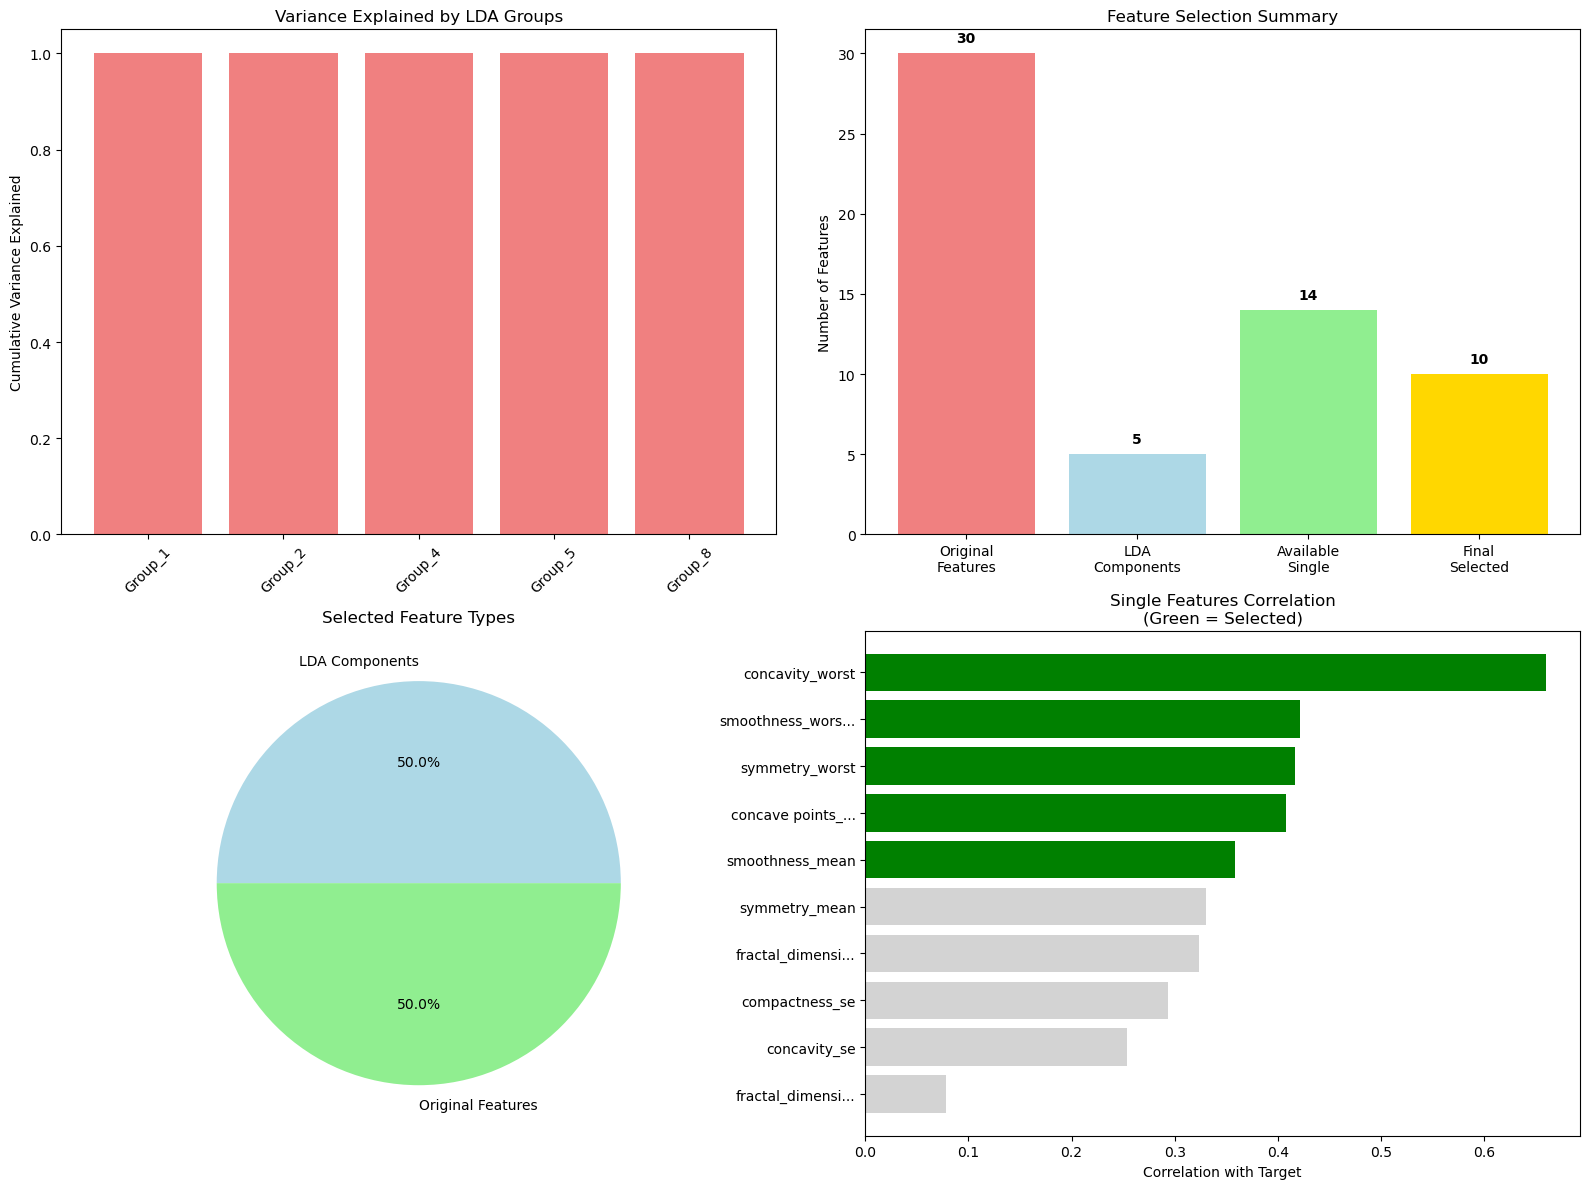


Dataset ready with 10 optimized features!


In [23]:
# Visualize results
if len(lda_feature_names) > 0:
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    # Plot 1: Variance explained by each LDA group
    group_names = []
    total_variance = []
    
    for group_name, lda in lda_transformers.items():
        group_names.append(group_name)
        total_variance.append(np.sum(lda.explained_variance_ratio_))
    
    axes[0, 0].bar(group_names, total_variance, color='lightcoral')
    axes[0, 0].set_title('Variance Explained by LDA Groups')
    axes[0, 0].set_ylabel('Cumulative Variance Explained')
    axes[0, 0].tick_params(axis='x', rotation=45)
    
    # Plot 2: Feature reduction summary
    original_count = X.shape[1]
    lda_count = len(lda_feature_names)
    single_count = len(single_features)
    final_count = len(selected_features)
    
    categories = ['Original\nFeatures', 'LDA\nComponents', 'Available\nSingle', 'Final\nSelected']
    counts = [original_count, lda_count, single_count, final_count]
    colors = ['lightcoral', 'lightblue', 'lightgreen', 'gold']
    
    axes[0, 1].bar(categories, counts, color=colors)
    axes[0, 1].set_title('Feature Selection Summary')
    axes[0, 1].set_ylabel('Number of Features')
    
    # Add value labels on bars
    for i, (cat, count) in enumerate(zip(categories, counts)):
        axes[0, 1].text(i, count + 0.5, str(count), ha='center', va='bottom', fontweight='bold')
    
    # Plot 3: Feature type distribution in final selection
    lda_selected = [f for f in selected_features if 'LD' in f]
    original_selected = [f for f in selected_features if 'LD' not in f]
    
    feature_types = ['LDA Components', 'Original Features']
    feature_counts = [len(lda_selected), len(original_selected)]
    
    if sum(feature_counts) > 0:
        axes[1, 0].pie(feature_counts, labels=feature_types, autopct='%1.1f%%',
                       colors=['lightblue', 'lightgreen'])
        axes[1, 0].set_title('Selected Feature Types')
    else:
        axes[1, 0].text(0.5, 0.5, 'No features selected', ha='center', va='center')
        axes[1, 0].set_title('Selected Feature Types')
    
    # Plot 4: Correlation of selected single features with target
    if single_features and len(sorted_single) > 0:
        # Show top correlations
        top_corr_features = sorted_single[:min(10, len(sorted_single))]
        features_names = [f[0] for f in top_corr_features]
        correlations = [f[1] for f in top_corr_features]
        
        # Color selected vs non-selected
        colors = ['green' if f in selected_features else 'lightgray' for f in features_names]
        
        axes[1, 1].barh(range(len(features_names)), correlations, color=colors)
        axes[1, 1].set_yticks(range(len(features_names)))
        axes[1, 1].set_yticklabels([f[:15] + '...' if len(f) > 15 else f for f in features_names])
        axes[1, 1].set_xlabel('Correlation with Target')
        axes[1, 1].set_title('Single Features Correlation\n(Green = Selected)')
        axes[1, 1].invert_yaxis()
    else:
        axes[1, 1].text(0.5, 0.5, 'No single features\nto analyze', ha='center', va='center')
        axes[1, 1].set_title('Single Features Correlation')
    
    plt.tight_layout()
    plt.show()

print(f"\nDataset ready with {len(selected_features)} optimized features!")

In [23]:
#note that captured variance of 1 means that projected data is 
# perfectly separable by the LDA components. All differences 
# between classes are captured by the resulting 1 dimention.

## 6. Data Splitting and Scaling

Split the dataset into training and testing sets, apply feature scaling using StandardScaler or MinMaxScaler to normalize the feature values.

In [24]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_selected_df, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")
print(f"Training target distribution:")
print(y_train.value_counts())
print(f"Testing target distribution:")
print(y_test.value_counts())

Training set shape: (455, 10)
Testing set shape: (114, 10)
Training target distribution:
diagnosis
0    285
1    170
Name: count, dtype: int64
Testing target distribution:
diagnosis
0    72
1    42
Name: count, dtype: int64


In [25]:
# Apply feature scaling
# StandardScaler (zero mean, unit variance)
scaler_standard = StandardScaler()
X_train_scaled = scaler_standard.fit_transform(X_train)
X_test_scaled = scaler_standard.transform(X_test)

# X_test, we only use transform. We use the scaler_standard that has already 
# "learned" from X_train to scale X_test. This ensures that X_test 
# is scaled in a consistent manner with X_train, using the same reference points.
# we don't want to learn new conversion rules based on their test data. Why? 
# Because if you did, you'd be introducing information from the test set into 
# your scaling process, which 
# could make your model seem better than it actually is (this is called "data leakage")

# #MinMaxScaler (0-1 range)
# scaler_minmax = MinMaxScaler()
# X_train_minmax = scaler_minmax.fit_transform(X_train)
# X_test_minmax = scaler_minmax.transform(X_test)

print("Feature scaling completed!")

Feature scaling completed!


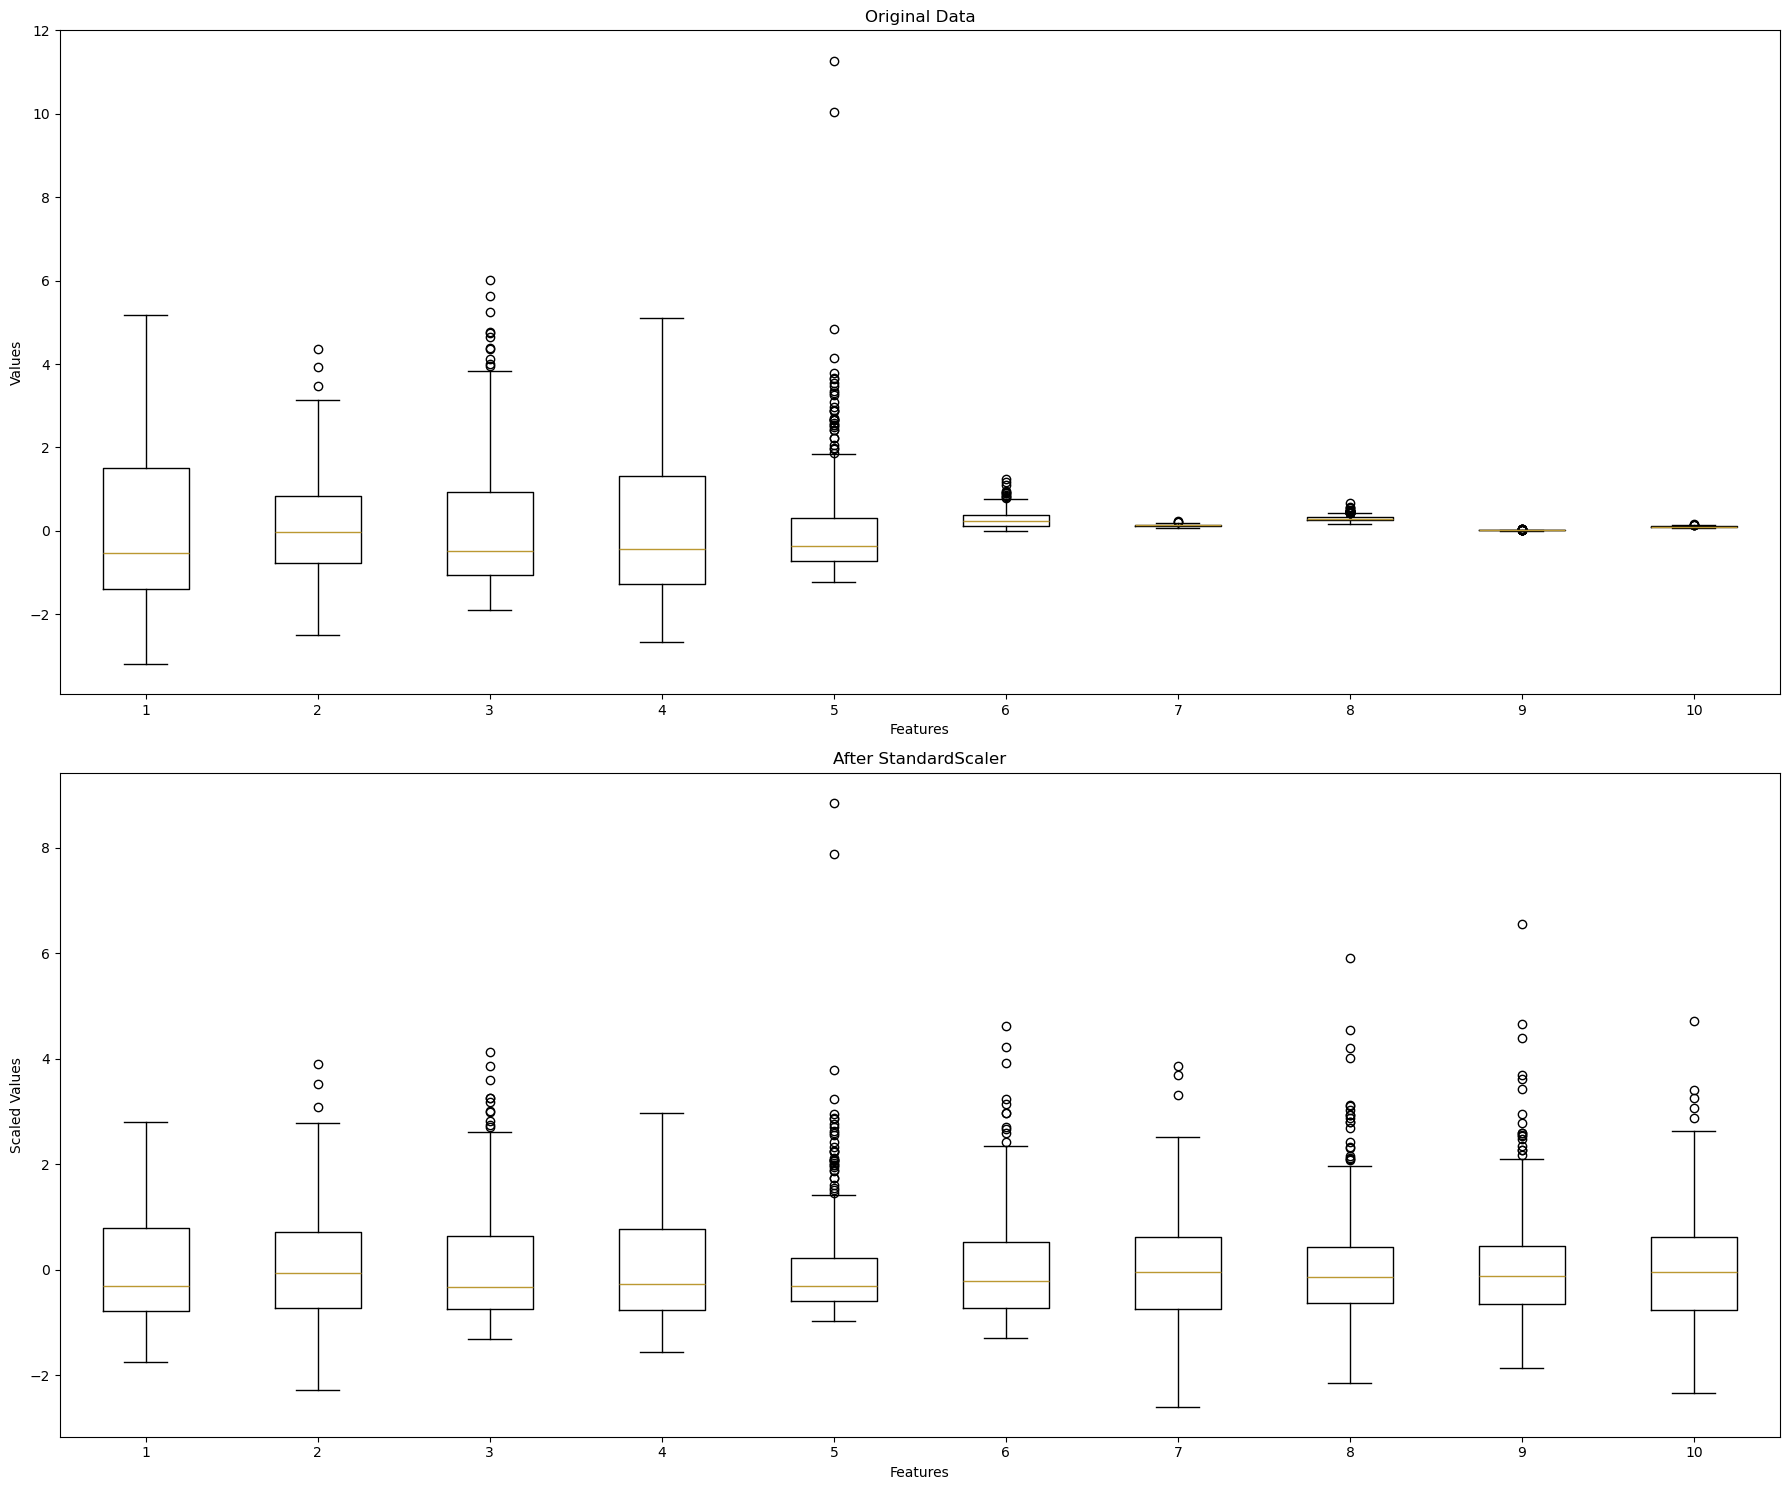

In [26]:
# Visualize the effect of scaling
fig, axes = plt.subplots(2, 1, figsize=(18, 15))

# Original data
axes[0].boxplot(X_train)
axes[0].set_title('Original Data')
axes[0].set_xlabel('Features')
axes[0].set_ylabel('Values')

# StandardScaler
axes[1].boxplot(X_train_scaled)
axes[1].set_title('After StandardScaler')
axes[1].set_xlabel('Features')
axes[1].set_ylabel('Scaled Values')

# # MinMaxScaler
# axes[2].boxplot(X_train_minmax[:, :5])
# axes[2].set_title('After MinMaxScaler')
# axes[2].set_xlabel('Features')
# axes[2].set_ylabel('Scaled Values')

plt.tight_layout()
plt.show()

## 7. Model Implementation and Training

Implement multiple machine learning algorithms including Logistic Regression, Random Forest, SVM, Gradient Boosting, to train predictive models.

Why These Models?
1. **Logistic Regression:**  
    Linear model, fast and interpretable  
    Good baseline for binary classification  
    Works well with scaled features  
2. **Random Forest:**  
    Ensemble of decision trees  
    Handles non-linear relationships  
    Provides feature importance  
    Robust to outliers  
3. **SVM (Support Vector Machine):**  
    Finds optimal decision boundary  
    Effective with high-dimensional data  
4. **Gradient Boosting:**  
    Ensemble method that builds trees sequentially  
    Focuses on correcting errors of previous trees  
    Often achieves high accuracy  
    Good for complex patterns  


In [27]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(random_state=42, probability=True),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    #'Neural Network': MLPClassifier(random_state=42, max_iter=1000)
}

# Train models and store results
model_results = {}
trained_models = {}

print("Training models...")
for name, model in models.items():
    print(f"\nTraining {name}...")
    
    # Train the model
    model.fit(X_train_scaled, y_train)
    trained_models[name] = model
    
    # Make predictions
    y_pred = model.predict(X_test_scaled)
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1] #stores probability of being malignant (1)
    
    # Store results
    model_results[name] = {
        'y_pred': y_pred,
        'y_pred_proba': y_pred_proba
    }
    
    print(f"{name} training completed!")

print("\nAll models trained successfully!")

Training models...

Training Logistic Regression...
Logistic Regression training completed!

Training Random Forest...
Random Forest training completed!

Training SVM...
SVM training completed!

Training Gradient Boosting...
Gradient Boosting training completed!

All models trained successfully!


In [28]:
# Cross-validation scores
print("Cross-validation scores (5-fold):")
cv_scores = {}

for name, model in models.items():
    scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')
    cv_scores[name] = scores
    print(f"{name}: {scores.mean():.4f} (+/- {scores.std() * 2:.4f})")

Cross-validation scores (5-fold):
Logistic Regression: 0.9560 (+/- 0.0393)
Random Forest: 0.9604 (+/- 0.0493)
SVM: 0.9582 (+/- 0.0596)
Gradient Boosting: 0.9538 (+/- 0.0378)


In [29]:
# trained_models[name]: Single model trained on all training data → Used for final predictions
# cv_scores[name]: Performance estimate from 5 separate training runs → Used for model comparison

## 8. Model Evaluation and Comparison

Evaluate each model using accuracy, precision, recall, F1-score, ROC-AUC, and confusion matrices. Compare performance across different algorithms.

In [29]:
# Calculate evaluation metrics for all models
evaluation_results = {}

for name in models.keys():
    y_pred = model_results[name]['y_pred']
    y_pred_proba = model_results[name]['y_pred_proba']
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    
    evaluation_results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC-AUC': roc_auc
    }

# Create comparison dataframe
comparison_df = pd.DataFrame(evaluation_results).T
comparison_df = comparison_df.round(4)
print("Model Performance Comparison:")
print(comparison_df)

Model Performance Comparison:
                     Accuracy  Precision  Recall  F1-Score  ROC-AUC
Logistic Regression    0.9649     0.9750  0.9286    0.9512   0.9954
Random Forest          0.9737     1.0000  0.9286    0.9630   0.9952
SVM                    0.9474     0.9737  0.8810    0.9250   0.9970
Gradient Boosting      0.9649     1.0000  0.9048    0.9500   0.9967


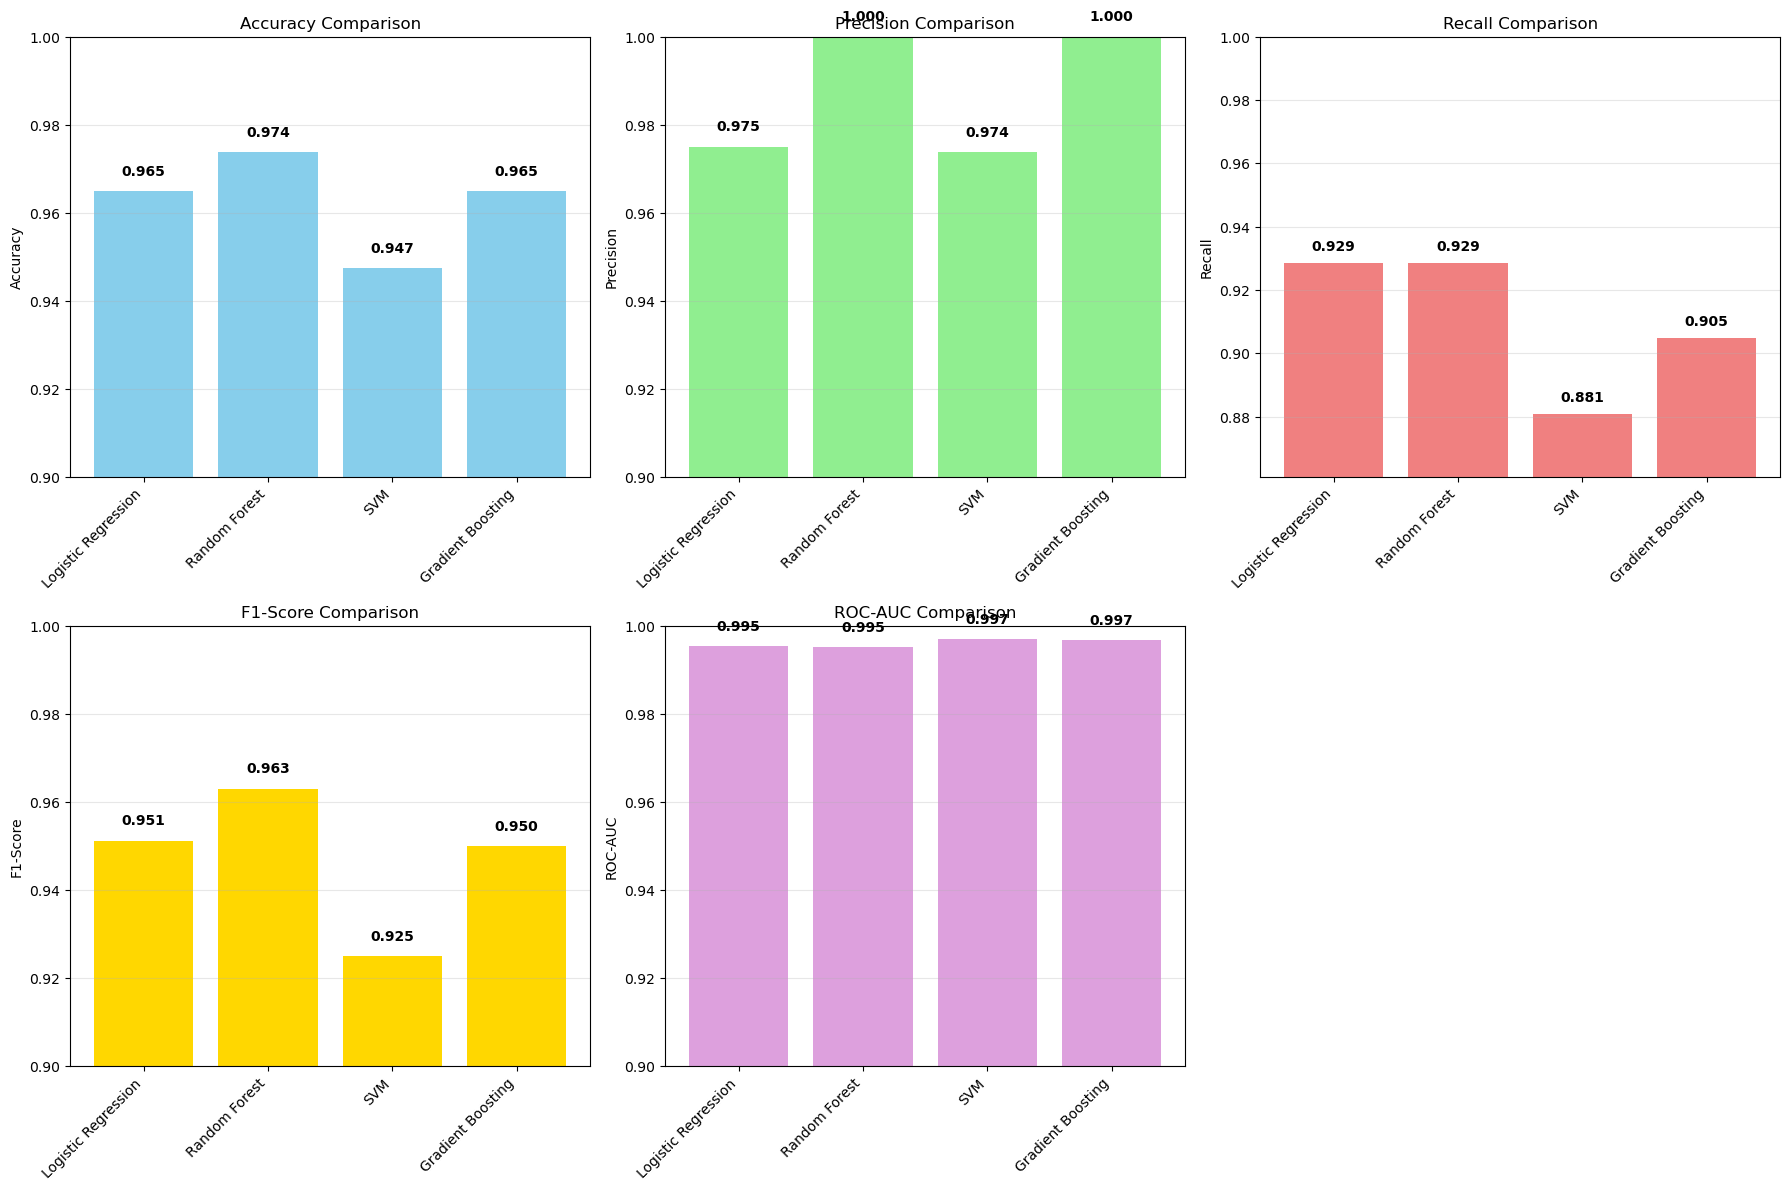

In [30]:
# Visualize model performance comparison
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
colors = ['skyblue', 'lightgreen', 'lightcoral', 'gold', 'plum']

for i, metric in enumerate(metrics):
    values = comparison_df[metric].values
    model_names = comparison_df.index
    
    bars = axes[i].bar(model_names, values, color=colors[i])
    axes[i].set_title(f'{metric} Comparison')
    axes[i].set_ylabel(metric)
    
    # Set y-axis limits to focus on upper range (0.9 to 1.0) for better visualization
    min_value = values.min()
    max_value = values.max()
    
    # If all values are above 0.9, use focused range
    if min_value > 0.9:
        axes[i].set_ylim(0.9, 1.0)
    # If values span across 0.9, use a range that shows detail
    elif max_value > 0.9:
        axes[i].set_ylim(max(0.8, min_value - 0.02), 1.0)
    else:
        # Default range for lower values
        axes[i].set_ylim(0, 1)
    
    # Add value labels on bars
    for bar, value in zip(bars, values):
        axes[i].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.003,
                    f'{value:.3f}', ha='center', va='bottom', fontsize=10, fontweight='bold')
    
    # Rotate x-axis labels for better readability
    plt.setp(axes[i].get_xticklabels(), rotation=45, ha='right')
    
    # Add grid for better readability in the focused range
    axes[i].grid(True, alpha=0.3, axis='y')

# Remove the empty subplot
axes[5].remove()

plt.tight_layout()
plt.show()

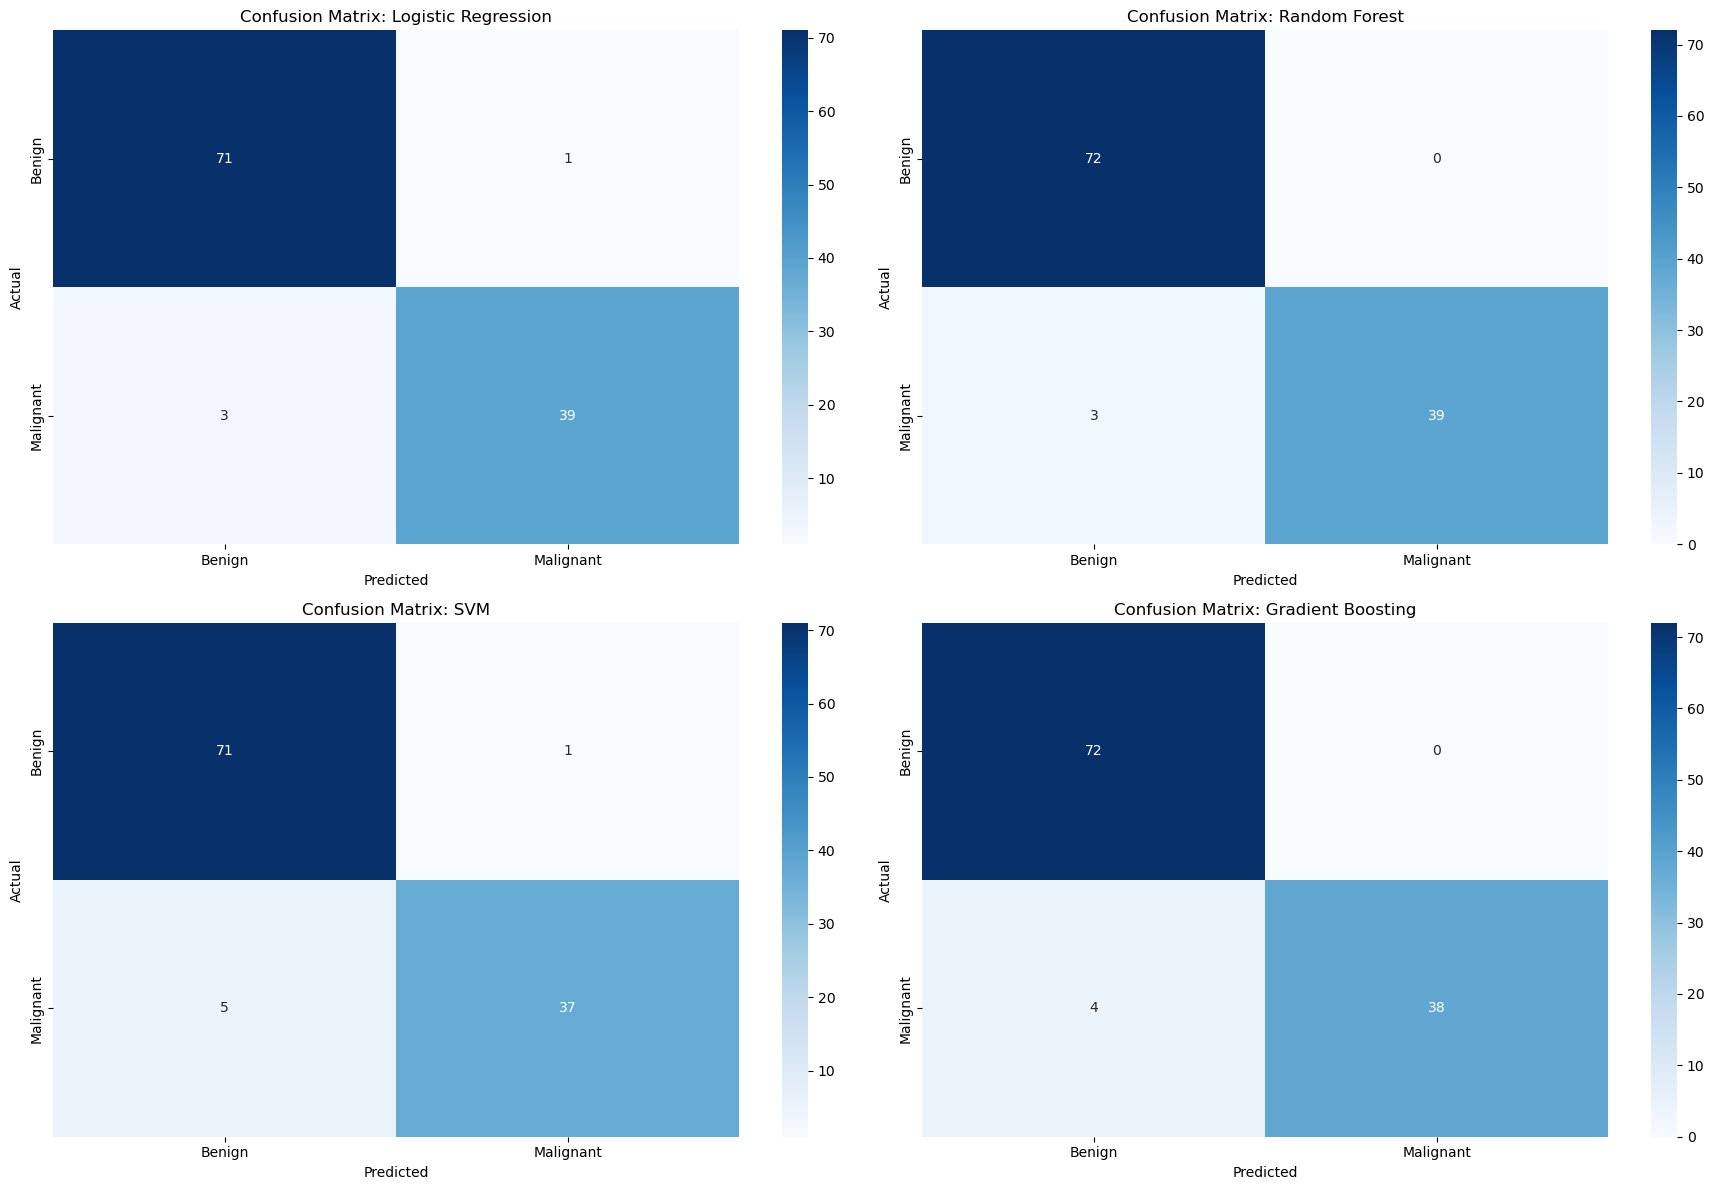

In [31]:
# Confusion matrices
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
axes = axes.ravel()

for i, (name, model) in enumerate(models.items()):
    y_pred = model_results[name]['y_pred']
    cm = confusion_matrix(y_test, y_pred)
    
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i])
    axes[i].set_title(f'Confusion Matrix: {name}')
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('Actual')
    axes[i].set_xticklabels(['Benign', 'Malignant'])
    axes[i].set_yticklabels(['Benign', 'Malignant'])


plt.tight_layout()
plt.show()

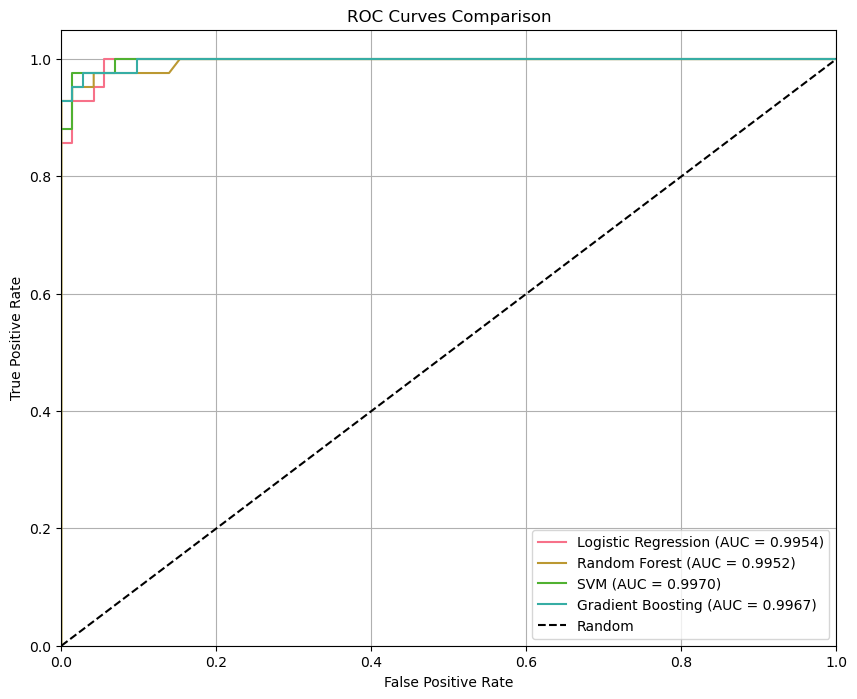

In [32]:
# ROC Curves
plt.figure(figsize=(10, 8))

for name in models.keys():
    y_pred_proba = model_results[name]['y_pred_proba']
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.4f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves Comparison')
plt.legend()
plt.grid(True)
plt.show()

In [34]:
# # Detailed classification reports
# for name in models.keys():
#     y_pred = model_results[name]['y_pred']
#     print(f"\n{'='*50}")
#     print(f"Classification Report: {name}")
#     print(f"{'='*50}")
#     print(classification_report(y_test, y_pred, target_names=['Benign', 'Malignant']))

## 9. Feature Importance Analysis

Analyze which cell measurement features are most important for prediction using feature importance plots and SHAP values or permutation importance.

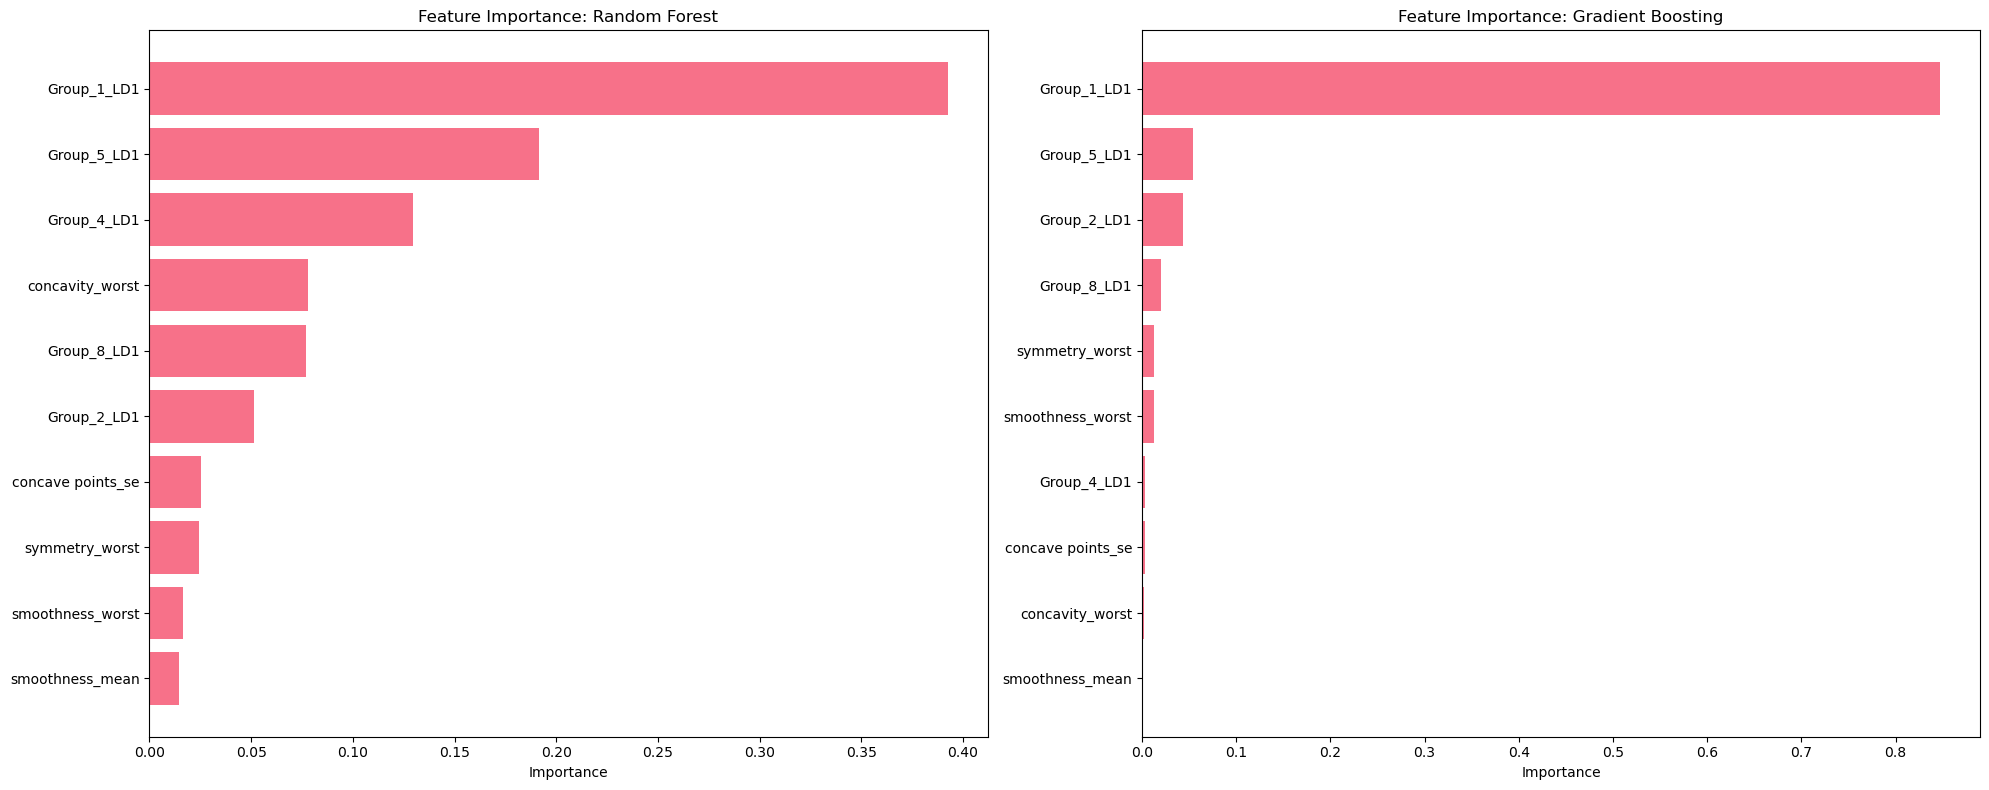

In [33]:
# Feature importance for tree-based models
tree_models = ['Random Forest', 'Gradient Boosting']

fig, axes = plt.subplots(1, 2, figsize=(20, 8))

for i, model_name in enumerate(tree_models):
    model = trained_models[model_name]
    
    # Get feature importance
    importance = model.feature_importances_
    feature_names = X_selected_df.columns
    
    # Create dataframe and sort
    importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importance
    }).sort_values('Importance', ascending=True)
    
    # Plot
    axes[i].barh(importance_df['Feature'], importance_df['Importance'])
    axes[i].set_title(f'Feature Importance: {model_name}')
    axes[i].set_xlabel('Importance')

plt.tight_layout()
plt.show()

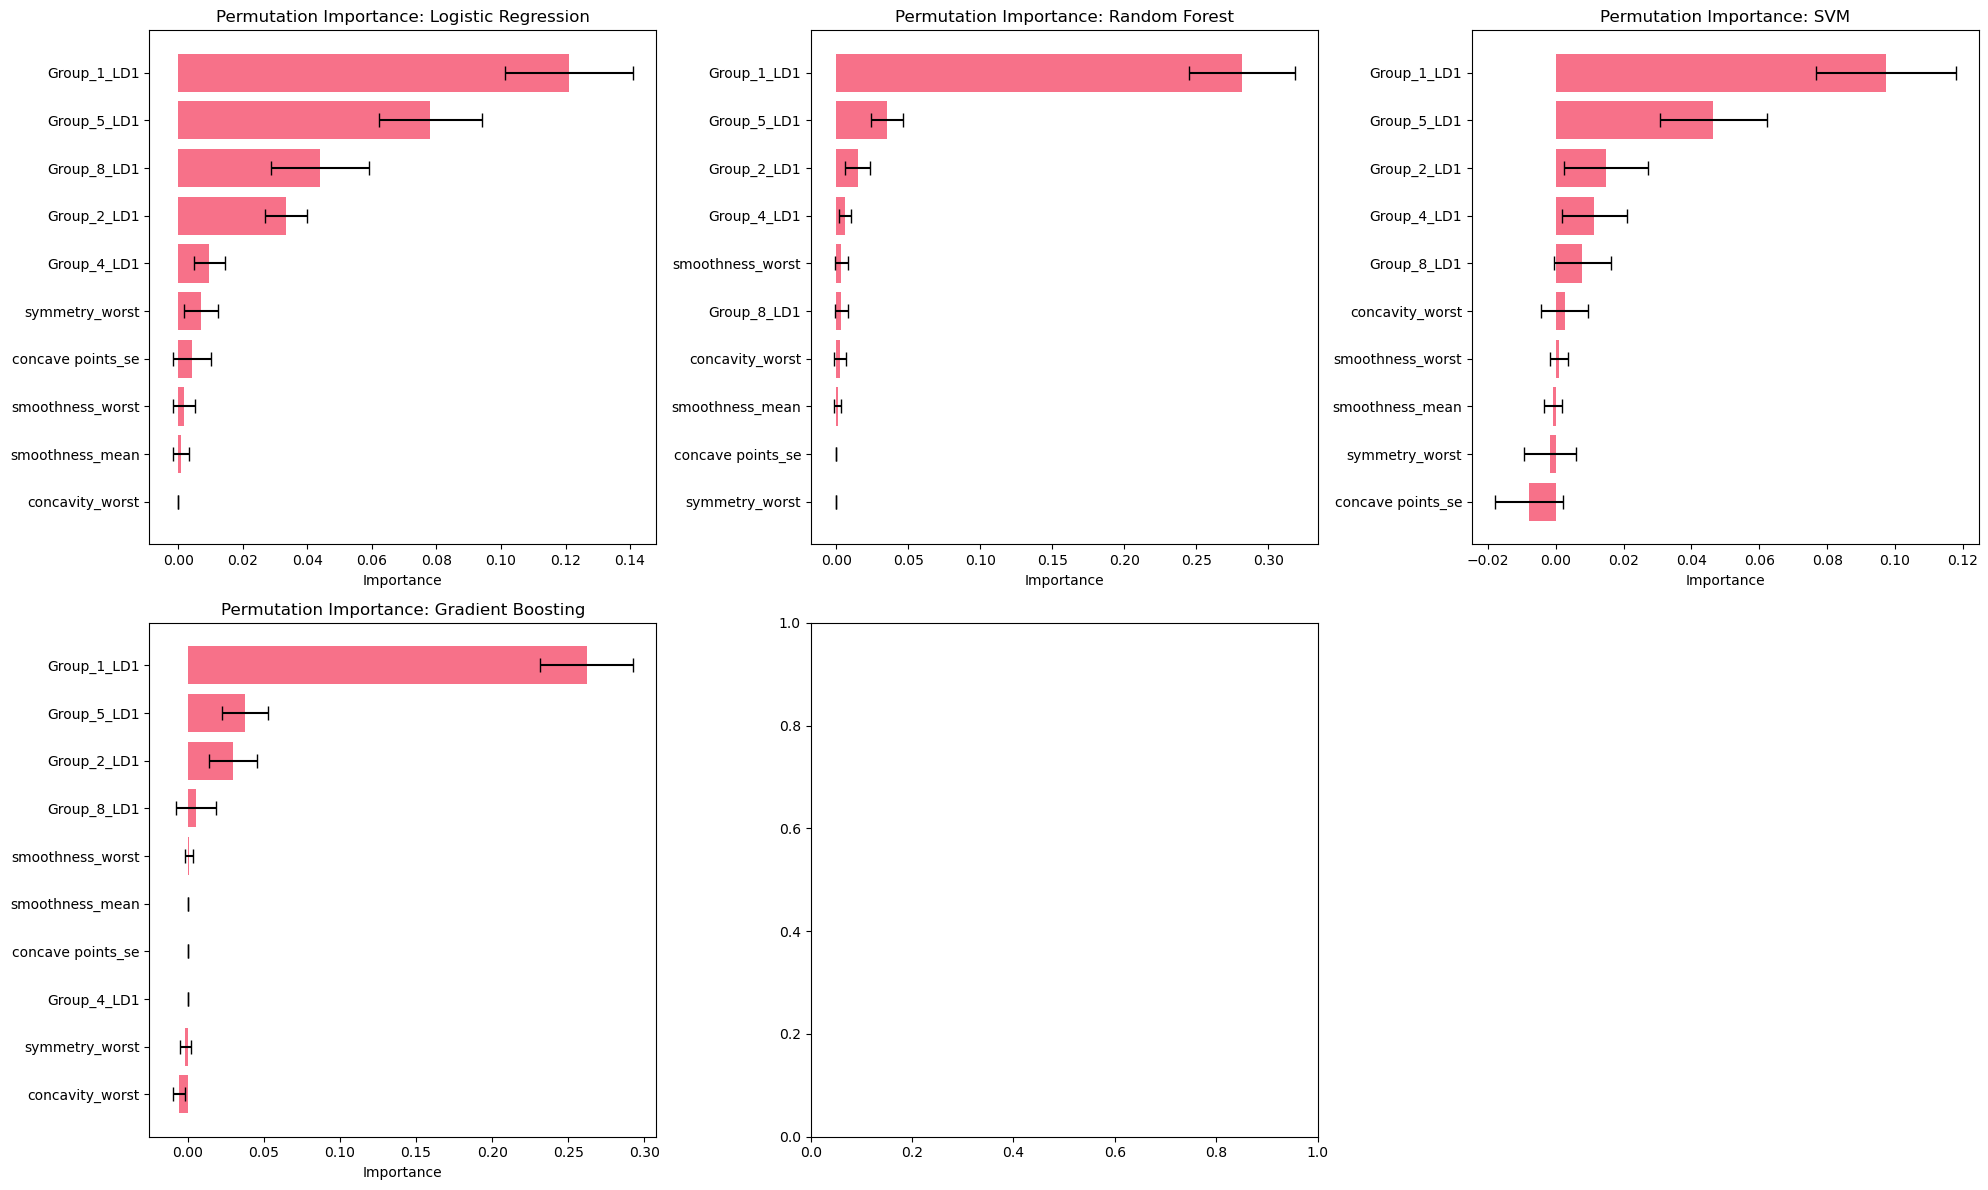

In [34]:
# Permutation importance for all models
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.ravel()

for i, (name, model) in enumerate(models.items()):
    # Calculate permutation importance
    perm_importance = permutation_importance(
        model, X_test_scaled, y_test, n_repeats=10, random_state=42
    )
    
    # Create dataframe
    perm_df = pd.DataFrame({
        'Feature': X_selected_df.columns,
        'Importance': perm_importance.importances_mean,
        'Std': perm_importance.importances_std
    }).sort_values('Importance', ascending=True)
    
    # Plot top 10 features
    top_10 = perm_df.tail(10)
    axes[i].barh(top_10['Feature'], top_10['Importance'], 
                xerr=top_10['Std'], capsize=5)
    axes[i].set_title(f'Permutation Importance: {name}')
    axes[i].set_xlabel('Importance')

# Remove the empty subplot
axes[5].remove()

plt.tight_layout()
plt.show()

In [35]:
# SHAP analysis for the best performing model
# Find the best model based on ROC-AUC
best_model_name = comparison_df['ROC-AUC'].idxmax()
best_model = trained_models[best_model_name]

print(f"Best performing model: {best_model_name}")
print(f"ROC-AUC Score: {comparison_df.loc[best_model_name, 'ROC-AUC']:.4f}")

# Initialize SHAP explainer
try:
    if best_model_name in ['Random Forest', 'Gradient Boosting']:
        explainer = shap.TreeExplainer(best_model)
        shap_values = explainer.shap_values(X_test_scaled)
        
        # For binary classification, take the positive class
        if len(shap_values) == 2:
            shap_values = shap_values[1]
        
        # Summary plot
        plt.figure(figsize=(10, 8))
        shap.summary_plot(shap_values, X_test_scaled, feature_names=X_selected_df.columns, show=False)
        plt.title(f'SHAP Summary Plot: {best_model_name}')
        plt.tight_layout()
        plt.show()
        
    else:
        print(f"SHAP TreeExplainer not available for {best_model_name}")
        
except Exception as e:
    print(f"SHAP analysis failed: {e}")
    print("Continuing without SHAP analysis...")

Best performing model: SVM
ROC-AUC Score: 0.9970
SHAP TreeExplainer not available for SVM


## 10. Model Optimization and Hyperparameter Tuning

Use GridSearchCV or RandomizedSearchCV to optimize hyperparameters for the best-performing models and improve their accuracy.

In [36]:
# Define hyperparameter grids for top performing models
param_grids = {
    'Random Forest': {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'Gradient Boosting': {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7],
        'min_samples_split': [2, 5, 10]
    },
    'SVM': {
        'C': [0.1, 1, 10, 100],
        'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],
        'kernel': ['rbf', 'poly']
    }
}

# Select top 3 models for hyperparameter tuning
top_3_models = comparison_df.nlargest(3, 'ROC-AUC').index.tolist()
print(f"Top 3 models for hyperparameter tuning: {top_3_models}")

Top 3 models for hyperparameter tuning: ['SVM', 'Gradient Boosting', 'Logistic Regression']


In [37]:
# Perform hyperparameter tuning
optimized_models = {}
best_params = {}

for model_name in top_3_models:
    if model_name in param_grids:
        print(f"\nOptimizing {model_name}...")
        
        # Get base model
        if model_name == 'Random Forest':
            base_model = RandomForestClassifier(random_state=42)
        elif model_name == 'Gradient Boosting':
            base_model = GradientBoostingClassifier(random_state=42)
        elif model_name == 'SVM':
            base_model = SVC(random_state=42, probability=True)
        
        # Perform grid search
        grid_search = GridSearchCV(
            base_model, 
            param_grids[model_name], 
            cv=5, 
            scoring='roc_auc',
            n_jobs=-1,
            verbose=1
        )
        
        grid_search.fit(X_train_scaled, y_train)
        
        # Store results
        optimized_models[model_name] = grid_search.best_estimator_
        best_params[model_name] = grid_search.best_params_
        
        print(f"Best parameters for {model_name}: {grid_search.best_params_}")
        print(f"Best cross-validation score: {grid_search.best_score_:.4f}")


Optimizing SVM...
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best parameters for SVM: {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}
Best cross-validation score: 0.9928

Optimizing Gradient Boosting...
Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best parameters for Gradient Boosting: {'learning_rate': 0.2, 'max_depth': 3, 'min_samples_split': 5, 'n_estimators': 100}
Best cross-validation score: 0.9911


In [38]:
# Evaluate optimized models
optimized_results = {}

for name, model in optimized_models.items():
    # Make predictions
    y_pred = model.predict(X_test_scaled)
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    
    optimized_results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC-AUC': roc_auc
    }

# Compare original vs optimized results
print("\nComparison: Original vs Optimized Models")
print("="*50)

for model_name in optimized_results.keys():
    print(f"\n{model_name}:")
    print(f"Original ROC-AUC: {comparison_df.loc[model_name, 'ROC-AUC']:.4f}")
    print(f"Optimized ROC-AUC: {optimized_results[model_name]['ROC-AUC']:.4f}")
    improvement = optimized_results[model_name]['ROC-AUC'] - comparison_df.loc[model_name, 'ROC-AUC']
    print(f"Improvement: {improvement:.4f}")


Comparison: Original vs Optimized Models

SVM:
Original ROC-AUC: 0.9970
Optimized ROC-AUC: 0.9970
Improvement: 0.0000

Gradient Boosting:
Original ROC-AUC: 0.9967
Optimized ROC-AUC: 0.9960
Improvement: -0.0007


f1 TESSTS HOW GOOD A CLSSIFICATION MODEL IS AT IDENTIFYING BOTH POSITIVE AND NEGATIVE CASES

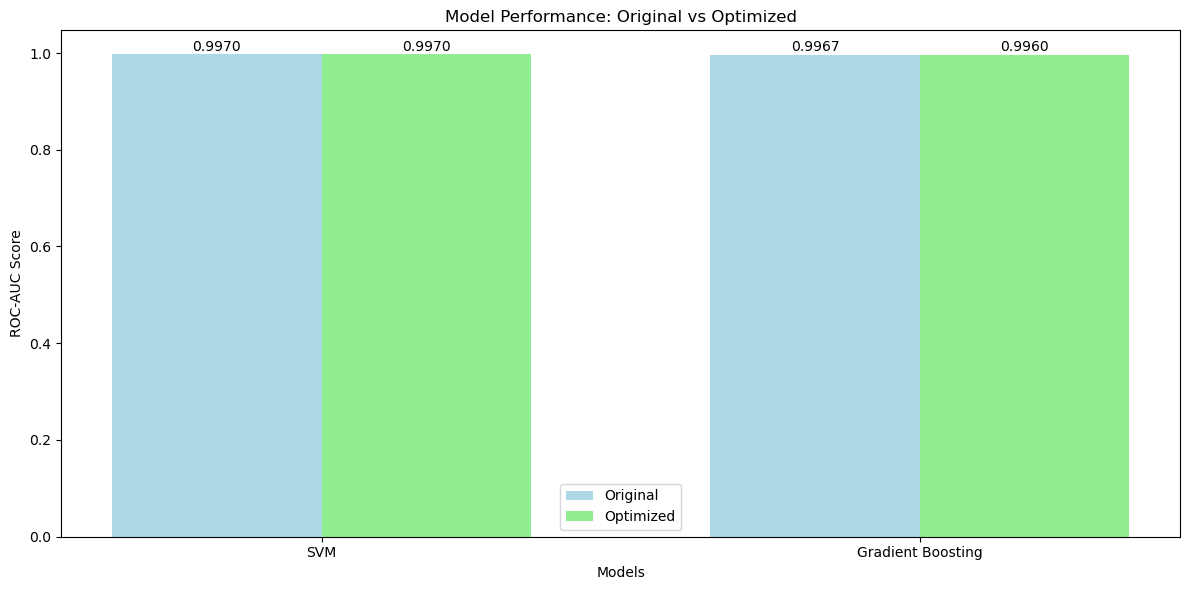

In [39]:
# Visualize the improvement
models_to_compare = list(optimized_results.keys())
original_scores = [comparison_df.loc[name, 'ROC-AUC'] for name in models_to_compare]
optimized_scores = [optimized_results[name]['ROC-AUC'] for name in models_to_compare]

x = np.arange(len(models_to_compare))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 6))
bars1 = ax.bar(x - width/2, original_scores, width, label='Original', color='lightblue')
bars2 = ax.bar(x + width/2, optimized_scores, width, label='Optimized', color='lightgreen')

ax.set_xlabel('Models')
ax.set_ylabel('ROC-AUC Score')
ax.set_title('Model Performance: Original vs Optimized')
ax.set_xticks(x)
ax.set_xticklabels(models_to_compare)
ax.legend()

# Add value labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.001,
                f'{height:.4f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

## 11. Final Model Validation

Validate the best model on the test set, create final performance metrics, generate classification reports, and make predictions on new data samples.

In [40]:
# Select the best optimized model
if optimized_results:
    best_optimized_model_name = max(optimized_results.keys(), 
                                   key=lambda x: optimized_results[x]['ROC-AUC'])
    final_model = optimized_models[best_optimized_model_name]
    final_model_name = best_optimized_model_name
else:
    # Fall back to original best model
    final_model_name = comparison_df['ROC-AUC'].idxmax()
    final_model = trained_models[final_model_name]

print(f"Final selected model: {final_model_name}")
print(f"Final model parameters: {final_model.get_params()}")

Final selected model: SVM
Final model parameters: {'C': 1, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'auto', 'kernel': 'rbf', 'max_iter': -1, 'probability': True, 'random_state': 42, 'shrinking': True, 'tol': 0.001, 'verbose': False}


In [41]:
# Final model evaluation
y_pred_final = final_model.predict(X_test_scaled)
y_pred_proba_final = final_model.predict_proba(X_test_scaled)[:, 1]

# Calculate all metrics
final_accuracy = accuracy_score(y_test, y_pred_final)
final_precision = precision_score(y_test, y_pred_final)
final_recall = recall_score(y_test, y_pred_final)
final_f1 = f1_score(y_test, y_pred_final)
final_roc_auc = roc_auc_score(y_test, y_pred_proba_final)

print(f"\nFinal Model Performance ({final_model_name}):")
print("="*50)
print(f"Accuracy:  {final_accuracy:.4f}")
print(f"Precision: {final_precision:.4f}")
print(f"Recall:    {final_recall:.4f}")
print(f"F1-Score:  {final_f1:.4f}")
print(f"ROC-AUC:   {final_roc_auc:.4f}")


Final Model Performance (SVM):
Accuracy:  0.9474
Precision: 0.9737
Recall:    0.8810
F1-Score:  0.9250
ROC-AUC:   0.9970


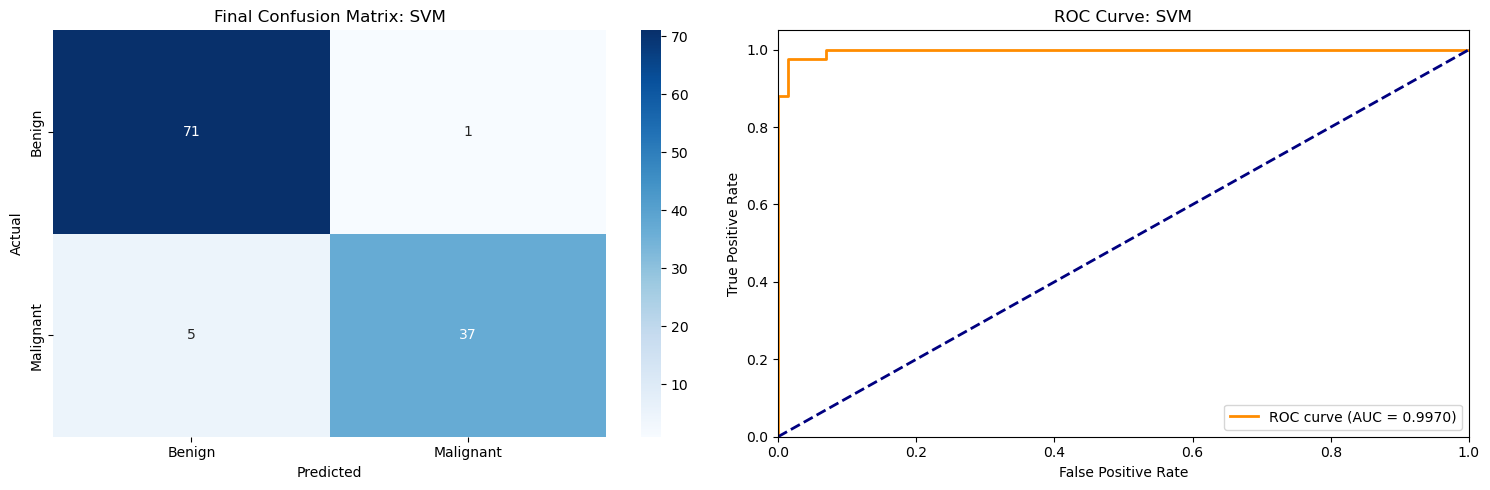


Detailed Classification Report (SVM):
              precision    recall  f1-score   support

      Benign       0.93      0.99      0.96        72
   Malignant       0.97      0.88      0.93        42

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



In [42]:
# Final confusion matrix and classification report
cm_final = confusion_matrix(y_test, y_pred_final)

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Confusion Matrix
sns.heatmap(cm_final, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title(f'Final Confusion Matrix: {final_model_name}')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')
axes[0].set_xticklabels(['Benign', 'Malignant'])
axes[0].set_yticklabels(['Benign', 'Malignant'])

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_final)
axes[1].plot(fpr, tpr, color='darkorange', lw=2, 
             label=f'ROC curve (AUC = {final_roc_auc:.4f})')
axes[1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[1].set_xlim([0.0, 1.0])
axes[1].set_ylim([0.0, 1.05])
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title(f'ROC Curve: {final_model_name}')
axes[1].legend(loc="lower right")

plt.tight_layout()
plt.show()

# Print detailed classification report
print(f"\nDetailed Classification Report ({final_model_name}):")
print("="*60)
print(classification_report(y_test, y_pred_final, target_names=['Benign', 'Malignant']))

In [43]:
# Feature importance of final model
if hasattr(final_model, 'feature_importances_'):
    feature_importance_final = pd.DataFrame({
        'Feature': X_selected_df.columns,
        'Importance': final_model.feature_importances_
    }).sort_values('Importance', ascending=False)
    
    print("Top 10 Most Important Features (Final Model):")
    print(feature_importance_final.head(10))
    
    # Plot feature importance
    plt.figure(figsize=(12, 8))
    top_features = feature_importance_final.head(15)
    plt.barh(range(len(top_features)), top_features['Importance'])
    plt.yticks(range(len(top_features)), top_features['Feature'])
    plt.xlabel('Feature Importance')
    plt.title(f'Feature Importance: {final_model_name}')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

In [44]:
# Function to make predictions on new data
def predict_breast_cancer(new_data):
    """
    Make predictions on new breast cancer data
    
    Parameters:
    new_data: pandas DataFrame with the same features as training data
    
    Returns:
    predictions: array of predictions (0=Benign, 1=Malignant)
    probabilities: array of probabilities for malignant class
    """
    # Select the same features used in training
    new_data_selected = new_data[X_selected_df.columns]
    
    # Scale the data
    new_data_scaled = scaler_standard.transform(new_data_selected)
    
    # Make predictions
    predictions = final_model.predict(new_data_scaled)
    probabilities = final_model.predict_proba(new_data_scaled)[:, 1]
    
    return predictions, probabilities

# Example: Make predictions on a few test samples
sample_indices = [0, 1, 2, 3, 4]
sample_data = X_test.iloc[sample_indices]
sample_true_labels = y_test.iloc[sample_indices]

predictions, probabilities = predict_breast_cancer(sample_data)

print("Sample Predictions:")
print("="*60)
for i, (idx, pred, prob, true_label) in enumerate(zip(sample_indices, predictions, probabilities, sample_true_labels)):
    diagnosis = "Malignant" if pred == 1 else "Benign"
    true_diagnosis = "Malignant" if true_label == 1 else "Benign"
    print(f"Sample {i+1}: Predicted = {diagnosis} ({prob:.3f}), Actual = {true_diagnosis}")

Sample Predictions:
Sample 1: Predicted = Benign (0.005), Actual = Benign
Sample 2: Predicted = Malignant (0.996), Actual = Malignant
Sample 3: Predicted = Benign (0.011), Actual = Benign
Sample 4: Predicted = Malignant (0.803), Actual = Malignant
Sample 5: Predicted = Benign (0.240), Actual = Benign


In [45]:
# Model summary and conclusions
print("\n" + "="*70)
print("BREAST CANCER PREDICTION MODEL - FINAL SUMMARY")
print("="*70)

print(f"\nDataset Information:")
print(f"- Total samples: {df.shape[0]}")
print(f"- Original features: {df.shape[1]-1}")
print(f"- Selected features: {len(X_selected_df.columns)}")
print(f"- Training samples: {len(X_train)}")
print(f"- Testing samples: {len(X_test)}")

print(f"\nFinal Model: {final_model_name}")
print(f"- Accuracy: {final_accuracy:.4f}")
print(f"- Precision: {final_precision:.4f}")
print(f"- Recall: {final_recall:.4f}")
print(f"- F1-Score: {final_f1:.4f}")
print(f"- ROC-AUC: {final_roc_auc:.4f}")

print(f"\nKey Insights:")
print(f"- The model achieves {final_accuracy:.1%} accuracy on the test set")
print(f"- {final_precision:.1%} of predicted malignant cases are actually malignant")
print(f"- {final_recall:.1%} of actual malignant cases are correctly identified")
print(f"- ROC-AUC of {final_roc_auc:.4f} indicates excellent discriminative ability")

if hasattr(final_model, 'feature_importances_'):
    most_important_feature = feature_importance_final.iloc[0]['Feature']
    print(f"- Most important feature: {most_important_feature}")

print(f"\nModel is ready for deployment and can be used to predict breast cancer diagnosis!")
print("="*70)


BREAST CANCER PREDICTION MODEL - FINAL SUMMARY

Dataset Information:
- Total samples: 569
- Original features: 30
- Selected features: 10
- Training samples: 455
- Testing samples: 114

Final Model: SVM
- Accuracy: 0.9474
- Precision: 0.9737
- Recall: 0.8810
- F1-Score: 0.9250
- ROC-AUC: 0.9970

Key Insights:
- The model achieves 94.7% accuracy on the test set
- 97.4% of predicted malignant cases are actually malignant
- 88.1% of actual malignant cases are correctly identified
- ROC-AUC of 0.9970 indicates excellent discriminative ability

Model is ready for deployment and can be used to predict breast cancer diagnosis!


In [46]:
# Save the final model and preprocessing objects
import joblib

# Create a model package
model_package = {
    'model': final_model,
    'scaler': scaler_standard,
    'feature_names': X_selected_df.columns.tolist(),
    'model_name': final_model_name,
    'performance_metrics': {
        'accuracy': final_accuracy,
        'precision': final_precision,
        'recall': final_recall,
        'f1_score': final_f1,
        'roc_auc': final_roc_auc
    }
}

# Save the model package
joblib.dump(model_package, 'breast_cancer_model.pkl')
print("Model saved as 'breast_cancer_model.pkl'")

# Save feature importance if available
if hasattr(final_model, 'feature_importances_'):
    feature_importance_final.to_csv('feature_importance.csv', index=False)
    print("Feature importance saved as 'feature_importance.csv'")

print("\nModel deployment package created successfully!")

Model saved as 'breast_cancer_model.pkl'

Model deployment package created successfully!


## 12. Interactive Prediction Demo

This section creates an interactive GUI demo that opens in a new window where users can input all 30 cell measurement values and receive predictions about whether a tumor is malignant or benign using our best-performing model.

In [64]:
# Import required libraries for GUI
import tkinter as tk
from tkinter import ttk, messagebox, scrolledtext
import threading

# Define all 30 original feature names in order
original_feature_names = [
    'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean',
    'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
    'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
    'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se',
    'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst',
    'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst'
]

# Calculate feature statistics for input validation and defaults
feature_stats = {}
for feature in original_feature_names:
    if feature in X.columns:
        stats = {
            'min': float(X[feature].min()),
            'max': float(X[feature].max()),
            'mean': float(X[feature].mean()),
            'std': float(X[feature].std())
        }
        feature_stats[feature] = stats

print(f"Feature statistics calculated for {len(feature_stats)} features!")
print(f"Using model: {final_model_name}")

Feature statistics calculated for 30 features!
Using model: SVM


In [47]:
class BreastCancerPredictionGUI:
    def __init__(self):
        self.root = tk.Tk()
        self.root.title("Breast Cancer Prediction Tool")
        self.root.geometry("1200x800")
        self.root.configure(bg='#f0f0f0')
        
        # Store entry widgets and their values
        self.entry_widgets = {}
        self.feature_values = {}
        
        # Initialize feature values with mean values
        for feature in original_feature_names:
            if feature in feature_stats:
                self.feature_values[feature] = feature_stats[feature]['mean']
            else:
                self.feature_values[feature] = 0.0
        
        self.setup_gui()
        
    def setup_gui(self):
        """Setup the main GUI components"""
        # Main title
        title_frame = tk.Frame(self.root, bg='#2c3e50', height=80)
        title_frame.pack(fill='x', padx=5, pady=5)
        title_frame.pack_propagate(False)
        
        title_label = tk.Label(title_frame, text='🔬 Breast Cancer Prediction Tool', 
                              font=('Arial', 20, 'bold'), fg='white', bg='#2c3e50')
        title_label.pack(expand=True)
        
        # Warning frame
        warning_frame = tk.Frame(self.root, bg='#f39c12', height=60)
        warning_frame.pack(fill='x', padx=5, pady=(0,5))
        warning_frame.pack_propagate(False)
        
        warning_label = tk.Label(warning_frame, 
                               text='⚠️ FOR EDUCATIONAL PURPOSES ONLY - NOT FOR MEDICAL DIAGNOSIS',
                               font=('Arial', 12, 'bold'), fg='white', bg='#f39c12')
        warning_label.pack(expand=True)
        
        # Create notebook for organizing features
        self.notebook = ttk.Notebook(self.root)
        self.notebook.pack(fill='both', expand=True, padx=5, pady=5)
        
        # Create tabs for different feature groups
        self.create_feature_tabs()
        
        # Control buttons frame
        button_frame = tk.Frame(self.root, bg='#f0f0f0', height=80)
        button_frame.pack(fill='x', padx=5, pady=5)
        button_frame.pack_propagate(False)
        
        # Buttons
        self.create_buttons(button_frame)
        
        # Results frame
        self.results_frame = tk.Frame(self.root, bg='#ecf0f1', height=120)
        self.results_frame.pack(fill='x', padx=5, pady=5)
        self.results_frame.pack_propagate(False)
        
        self.results_label = tk.Label(self.results_frame, text='Results will appear here...',
                                     font=('Arial', 12), bg='#ecf0f1')
        self.results_label.pack(expand=True)
        
    def create_feature_tabs(self):
        """Create tabs for different feature groups"""
        # Group features by type
        feature_groups = {
            'Mean Features': original_feature_names[:10],
            'Standard Error Features': original_feature_names[10:20],
            'Worst Features': original_feature_names[20:30]
        }
        
        for group_name, features in feature_groups.items():
            # Create tab frame
            tab_frame = ttk.Frame(self.notebook)
            self.notebook.add(tab_frame, text=group_name)
            
            # Create scrollable frame
            canvas = tk.Canvas(tab_frame, bg='white')
            scrollbar = ttk.Scrollbar(tab_frame, orient='vertical', command=canvas.yview)
            scrollable_frame = ttk.Frame(canvas)
            
            scrollable_frame.bind(
                '<Configure>',
                lambda e: canvas.configure(scrollregion=canvas.bbox('all'))
            )
            
            canvas.create_window((0, 0), window=scrollable_frame, anchor='nw')
            canvas.configure(yscrollcommand=scrollbar.set)
            
            # Pack scrollable components
            canvas.pack(side='left', fill='both', expand=True)
            scrollbar.pack(side='right', fill='y')
            
            # Create input fields for this group
            self.create_input_fields(scrollable_frame, features)
            
    def create_input_fields(self, parent, features):
        """Create input fields for a list of features"""
        for i, feature in enumerate(features):
            # Create frame for each feature
            feature_frame = tk.Frame(parent, bg='white', relief='raised', bd=1)
            feature_frame.pack(fill='x', padx=10, pady=5)
            
            # Feature name label
            name_label = tk.Label(feature_frame, text=feature, font=('Arial', 10, 'bold'),
                                 bg='white', width=25, anchor='w')
            name_label.pack(side='left', padx=5, pady=5)
            
            # Get feature statistics if available
            if feature in feature_stats:
                stats = feature_stats[feature]
                range_text = f"Range: {stats['min']:.3f} - {stats['max']:.3f}"
                default_val = stats['mean']
            else:
                range_text = "Range: Unknown"
                default_val = 0.0
            
            # Range label
            range_label = tk.Label(feature_frame, text=range_text, font=('Arial', 8),
                                  fg='gray', bg='white', width=25)
            range_label.pack(side='left', padx=5)
            
            # Entry widget
            entry_var = tk.StringVar(value=f"{default_val:.6f}")
            entry = tk.Entry(feature_frame, textvariable=entry_var, font=('Arial', 10),
                           width=15, justify='center')
            entry.pack(side='left', padx=5, pady=5)
            
            # Store the entry widget and variable
            self.entry_widgets[feature] = entry_var
            
            # Reset to mean button
            reset_btn = tk.Button(feature_frame, text='Reset', command=lambda f=feature: self.reset_feature(f),
                                 font=('Arial', 8), bg='#3498db', fg='white', width=8)
            reset_btn.pack(side='right', padx=5, pady=2)
            
    def create_buttons(self, parent):
        """Create control buttons"""
        # Button style
        button_style = {'font': ('Arial', 12, 'bold'), 'height': 2, 'width': 15}
        
        # Predict button
        predict_btn = tk.Button(parent, text='🔍 PREDICT', command=self.predict_tumor,
                              bg='#27ae60', fg='white', **button_style)
        predict_btn.pack(side='left', padx=10, pady=10)
        
        # Reset all button
        reset_btn = tk.Button(parent, text='🔄 RESET ALL', command=self.reset_all_features,
                            bg='#e74c3c', fg='white', **button_style)
        reset_btn.pack(side='left', padx=10, pady=10)
        
        # Load example buttons
        example_btn1 = tk.Button(parent, text='📋 Benign Example', command=lambda: self.load_example('benign'),
                               bg='#3498db', fg='white', **button_style)
        example_btn1.pack(side='left', padx=10, pady=10)
        
        example_btn2 = tk.Button(parent, text='📋 Malignant Example', command=lambda: self.load_example('malignant'),
                               bg='#9b59b6', fg='white', **button_style)
        example_btn2.pack(side='left', padx=10, pady=10)
        
    def reset_feature(self, feature):
        """Reset a single feature to its mean value"""
        if feature in feature_stats:
            mean_val = feature_stats[feature]['mean']
            self.entry_widgets[feature].set(f"{mean_val:.6f}")
        else:
            self.entry_widgets[feature].set("0.000000")
            
    def reset_all_features(self):
        """Reset all features to their mean values"""
        for feature in original_feature_names:
            self.reset_feature(feature)
        self.results_label.config(text='All values reset to defaults. Ready for new prediction.',
                                 fg='blue', bg='#ecf0f1')
        
    def load_example(self, example_type):
        """Load example values (benign or malignant cases)"""
        if example_type == 'benign':
            # Use mean values from benign cases
            example_data = X[y == 0].mean()
            self.results_label.config(text='Loaded typical BENIGN tumor values.',
                                     fg='green', bg='#ecf0f1')
        else:
            # Use mean values from malignant cases
            example_data = X[y == 1].mean()
            self.results_label.config(text='Loaded typical MALIGNANT tumor values.',
                                     fg='red', bg='#ecf0f1')
        
        # Set the values in the entry widgets
        for feature in original_feature_names:
            if feature in example_data:
                self.entry_widgets[feature].set(f"{example_data[feature]:.6f}")
                
    def validate_inputs(self):
        """Validate all input values"""
        validated_values = {}
        errors = []
        
        for feature in original_feature_names:
            try:
                value = float(self.entry_widgets[feature].get())
                
                # Check if value is within reasonable range
                if feature in feature_stats:
                    stats = feature_stats[feature]
                    min_val = stats['min']
                    max_val = stats['max']
                    
                    # Allow some flexibility beyond the training range
                    extended_min = min_val - (max_val - min_val) * 0.1
                    extended_max = max_val + (max_val - min_val) * 0.1
                    
                    if value < extended_min or value > extended_max:
                        errors.append(f"{feature}: {value:.3f} is outside reasonable range [{min_val:.3f}, {max_val:.3f}]")
                
                validated_values[feature] = value
                
            except ValueError:
                errors.append(f"{feature}: Invalid number format")
                
        return validated_values, errors
        
    def make_prediction_with_original_features(self, input_values):
        """Make prediction using original features and LDA transformation"""
        try:
            # Create DataFrame with original features
            input_df = pd.DataFrame([input_values])
            
            # Apply the same LDA transformation used during training
            lda_components_input = []
            lda_feature_names_input = []
            single_features_input = []
            
            for i, group in enumerate(correlated_groups, 1):
                group_name = f"Group_{i}"
                
                if len(group) == 1:
                    # Single feature - keep as is
                    if group[0] in input_df.columns:
                        single_features_input.extend(group)
                else:
                    # Multiple correlated features - apply saved LDA
                    if group_name in lda_transformers and group_name in lda_scalers:
                        group_data = input_df[group]
                        
                        # Scale using saved scaler
                        group_scaled = lda_scalers[group_name].transform(group_data)
                        
                        # Apply saved LDA transformation
                        group_lda = lda_transformers[group_name].transform(group_scaled)
                        
                        # Store components
                        component_names = [f"{group_name}_LD{j+1}" for j in range(group_lda.shape[1])]
                        lda_feature_names_input.extend(component_names)
                        
                        if len(lda_components_input) == 0:
                            lda_components_input = group_lda
                        else:
                            lda_components_input = np.column_stack([lda_components_input, group_lda])
            
            # Combine LDA components with single features
            if len(lda_components_input) > 0:
                lda_df = pd.DataFrame(lda_components_input, columns=lda_feature_names_input, index=input_df.index)
                single_features_df = input_df[single_features_input] if single_features_input else pd.DataFrame(index=input_df.index)
                X_transformed = pd.concat([lda_df, single_features_df], axis=1)
            else:
                X_transformed = input_df[single_features_input]
            
            # Select the same features used in training
            X_selected = X_transformed[X_selected_df.columns]
            
            # Scale using the same scaler used in training
            X_scaled = scaler_standard.transform(X_selected)
            
            # Make prediction
            prediction = final_model.predict(X_scaled)[0]
            probability = final_model.predict_proba(X_scaled)[0, 1]
            
            return prediction, probability, None
            
        except Exception as e:
            return None, None, str(e)
            
    def predict_tumor(self):
        """Main prediction function"""
        # Validate inputs
        validated_values, errors = self.validate_inputs()
        
        if errors:
            error_msg = "\n".join(errors[:5])  # Show first 5 errors
            if len(errors) > 5:
                error_msg += f"\n... and {len(errors) - 5} more errors"
            messagebox.showerror("Input Validation Errors", error_msg)
            return
        
        # Make prediction
        prediction, probability, error = self.make_prediction_with_original_features(validated_values)
        
        if error:
            messagebox.showerror("Prediction Error", f"Error during prediction: {error}")
            return
        
        # Display results
        self.display_results(prediction, probability)
        
    def display_results(self, prediction, probability):
        """Display prediction results"""
        diagnosis = "MALIGNANT" if prediction == 1 else "BENIGN"
        confidence = "High" if probability >= 0.8 or probability <= 0.2 else "Medium" if probability >= 0.6 or probability <= 0.4 else "Low"
        
        # Color coding
        if diagnosis == "MALIGNANT":
            bg_color = '#ffebee'
            text_color = '#c62828'
            icon = '⚠️'
        else:
            bg_color = '#e8f5e8'
            text_color = '#2e7d32'
            icon = '✅'
        
        result_text = f"{icon} PREDICTION: {diagnosis}\n"
        result_text += f"Malignancy Probability: {probability:.1%}\n"
        result_text += f"Confidence Level: {confidence}\n"
        result_text += f"Model: {final_model_name}"
        
        self.results_label.config(text=result_text, fg=text_color, bg=bg_color,
                                 font=('Arial', 12, 'bold'))
        
        # Show detailed results in popup
        self.show_detailed_results(diagnosis, probability, confidence)
        
    def show_detailed_results(self, diagnosis, probability, confidence):
        """Show detailed results in a popup window"""
        popup = tk.Toplevel(self.root)
        popup.title("Detailed Prediction Results")
        popup.geometry("500x400")
        popup.configure(bg='white')
        
        # Results text
        text_widget = scrolledtext.ScrolledText(popup, wrap=tk.WORD, font=('Arial', 11))
        text_widget.pack(fill='both', expand=True, padx=10, pady=10)
        
        detailed_text = f"""🔬 BREAST CANCER PREDICTION RESULTS
{'='*50}

PREDICTION: {diagnosis}
Malignancy Probability: {probability:.3f} ({probability*100:.1f}%)
Confidence Level: {confidence}
Model Used: {final_model_name}

{'='*50}
INTERPRETATION:

• Probability < 20%: Likely BENIGN
• Probability 20-80%: UNCERTAIN (Medium confidence)
• Probability > 80%: Likely MALIGNANT

{'='*50}
⚠️  IMPORTANT MEDICAL DISCLAIMER:

• This tool is for EDUCATIONAL PURPOSES ONLY
• NOT intended for actual medical diagnosis
• Always consult qualified healthcare professionals
• This model may produce false positives or negatives
• Actual medical diagnosis requires comprehensive evaluation

{'='*50}
Model Performance Metrics:
• Accuracy: {final_accuracy:.1%}
• Precision: {final_precision:.1%}
• Recall: {final_recall:.1%}
• ROC-AUC: {final_roc_auc:.4f}
"""
        
        text_widget.insert('1.0', detailed_text)
        text_widget.config(state='disabled')
        
        # Close button
        close_btn = tk.Button(popup, text='Close', command=popup.destroy,
                            font=('Arial', 12), bg='#3498db', fg='white')
        close_btn.pack(pady=10)
        
    def run(self):
        """Run the GUI application"""
        self.root.mainloop()

print("Breast Cancer Prediction GUI class created successfully!")

Breast Cancer Prediction GUI class created successfully!


In [48]:
# Function to launch the GUI in a separate thread
def launch_prediction_gui():
    """Launch the breast cancer prediction GUI"""
    try:
        app = BreastCancerPredictionGUI()
        app.run()
    except Exception as e:
        print(f"Error launching GUI: {e}")
        import traceback
        traceback.print_exc()

# Launch the GUI
print("\n" + "="*70)
print("🚀 LAUNCHING BREAST CANCER PREDICTION GUI")
print("="*70)
print("")
print("Features of the GUI:")
print("• Input fields for all 30 original features")
print("• Organized in tabs (Mean, Standard Error, Worst)")
print("• Real-time input validation")
print("• Example data loading (Benign/Malignant)")
print("• Detailed prediction results")
print("• Professional medical disclaimers")
print("")
print(f"Using model: {final_model_name}")
print(f"Model accuracy: {final_accuracy:.1%}")
print("")
print("🔍 Click the button below to launch the GUI in a new window!")
print("="*70)


🚀 LAUNCHING BREAST CANCER PREDICTION GUI

Features of the GUI:
• Input fields for all 30 original features
• Organized in tabs (Mean, Standard Error, Worst)
• Real-time input validation
• Example data loading (Benign/Malignant)
• Detailed prediction results
• Professional medical disclaimers

Using model: SVM
Model accuracy: 94.7%

🔍 Click the button below to launch the GUI in a new window!


In [49]:
# Create a simple launcher button (for Jupyter environments)
def create_launcher_button():
    """Create a simple launcher for the GUI"""
    try:
        from IPython.display import display, HTML
        import ipywidgets as widgets
        
        def launch_gui(button):
            print("Launching GUI in new window...")
            # Launch in separate thread to avoid blocking
            gui_thread = threading.Thread(target=launch_prediction_gui, daemon=True)
            gui_thread.start()
            print("GUI launched! Check for new window.")
        
        launch_button = widgets.Button(
            description='🚀 Launch Prediction GUI',
            button_style='success',
            layout={'width': '300px', 'height': '50px'}
        )
        
        launch_button.on_click(launch_gui)
        display(launch_button)
        
        # Alternative direct launch option
        print("\nAlternatively, you can launch directly by running:")
        print("launch_prediction_gui()")
        
    except ImportError:
        print("IPython widgets not available. Use direct launch:")
        print("launch_prediction_gui()")

# Create the launcher
create_launcher_button()

Button(button_style='success', description='🚀 Launch Prediction GUI', layout=Layout(height='50px', width='300p…


Alternatively, you can launch directly by running:
launch_prediction_gui()


NameError: name 'threading' is not defined

NameError: name 'threading' is not defined

In [50]:
# Direct launch option - UNCOMMENT THE LINE BELOW TO AUTO-LAUNCH GUI
launch_prediction_gui()

# Alternative: Simple command-line interface for testing
def command_line_demo():
    """Simple command-line demo for testing"""
    print("\n" + "="*60)
    print("COMMAND LINE PREDICTION DEMO")
    print("="*60)
    print("This is a simplified version for testing purposes.")
    print("For full functionality, use the GUI version above.")
    print("")
    
    # Get a sample from the test set
    sample_idx = 0
    sample_original = X.iloc[sample_idx]
    true_label = y.iloc[sample_idx]
    
    print(f"Sample {sample_idx} from dataset:")
    print(f"True diagnosis: {'Malignant' if true_label == 1 else 'Benign'}")
    print("")
    
    # Create prediction GUI instance for testing
    gui = BreastCancerPredictionGUI()
    
    # Prepare input values
    input_values = {}
    for feature in original_feature_names:
        if feature in sample_original:
            input_values[feature] = sample_original[feature]
        else:
            input_values[feature] = 0.0
    
    # Make prediction
    prediction, probability, error = gui.make_prediction_with_original_features(input_values)
    
    if error:
        print(f"Error: {error}")
    else:
        diagnosis = "MALIGNANT" if prediction == 1 else "BENIGN"
        print(f"Predicted diagnosis: {diagnosis}")
        print(f"Malignancy probability: {probability:.3f} ({probability*100:.1f}%)")
        print(f"Match with true label: {'✅' if prediction == true_label else '❌'}")
    
    print("\nTo use the full GUI, run: launch_prediction_gui()")
    print("="*60)

# Run command line demo as backup
print("\n💻 Testing prediction functionality...")
# command_line_demo()  # Commented out to avoid conflicts with GUI

Error launching GUI: name 'tk' is not defined

💻 Testing prediction functionality...


Traceback (most recent call last):
  File "/var/folders/pn/g2d5j12x5671_vnvw9dcf0f40000gn/T/ipykernel_80953/1704266104.py", line 5, in launch_prediction_gui
    app = BreastCancerPredictionGUI()
  File "/var/folders/pn/g2d5j12x5671_vnvw9dcf0f40000gn/T/ipykernel_80953/745528854.py", line 3, in __init__
    self.root = tk.Tk()
NameError: name 'tk' is not defined


### Model Limitations and Disclaimers

Important information about the model's limitations and proper usage.

In [51]:
# Display important disclaimers and model limitations
disclaimer_html = f"""
<div style='background-color: #ffebcc; border: 2px solid #ff9800; padding: 20px; margin: 20px 0; border-radius: 10px;'>
<h2>⚠️ IMPORTANT DISCLAIMERS</h2>

<h3>🔬 Model Information:</h3>
<ul>
<li><strong>Model Type:</strong> {final_model_name}</li>
<li><strong>Training Accuracy:</strong> {final_accuracy:.1%}</li>
<li><strong>ROC-AUC Score:</strong> {final_roc_auc:.4f}</li>
<li><strong>Features Used:</strong> {len(X_selected_df.columns)} out of {len(X.columns)} original features</li>
</ul>

<h3>🚨 Medical Disclaimer:</h3>
<ul>
<li>This model is for <strong>educational and research purposes only</strong></li>
<li>It should <strong>NOT</strong> be used as a substitute for professional medical diagnosis</li>
<li>Always consult qualified healthcare professionals for medical decisions</li>
<li>The model may produce false positives or false negatives</li>
</ul>

<h3>📊 Model Limitations:</h3>
<ul>
<li>Trained on specific dataset - may not generalize to all populations</li>
<li>Requires precise cell measurement values</li>
<li>Performance may vary with different measurement techniques</li>
<li>Should be used alongside other diagnostic methods</li>
</ul>

<h3>✅ Best Practices:</h3>
<ul>
<li>Use as a supplementary tool, not primary diagnostic method</li>
<li>Ensure input measurements are accurate and properly scaled</li>
<li>Consider confidence levels when interpreting results</li>
<li>Validate results with medical professionals</li>
</ul>
</div>
"""

display(HTML(disclaimer_html))

NameError: name 'HTML' is not defined

In [52]:
# Final demo summary and usage guide
print("\n" + "="*80)
print("🎯 DEMO SUMMARY AND USAGE GUIDE")
print("="*80)

print(f"\n📈 Model Performance Summary:")
print(f"   • Final Model: {final_model_name}")
print(f"   • Accuracy: {final_accuracy:.1%}")
print(f"   • Precision: {final_precision:.1%}")
print(f"   • Recall: {final_recall:.1%}")
print(f"   • ROC-AUC: {final_roc_auc:.4f}")

print(f"\n🔧 Available Demo Functions:")
print(f"   1. Interactive Widget Demo (above) - User-friendly sliders")
print(f"   2. manual_prediction_demo() - Text-based input")
print(f"   3. quick_predict(**kwargs) - Programmatic interface")
print(f"   4. predict_tumor(values_dict) - Direct prediction function")

print(f"\n📋 Example Test Cases Available:")
for case_name, case_data in example_cases.items():
    print(f"   • {case_name}: {case_data['Description']}")

print(f"\n🔍 Key Features for Prediction:")
if hasattr(final_model, 'feature_importances_'):
    top_5_features = feature_importance_final.head(5)['Feature'].tolist()
    for i, feature in enumerate(top_5_features, 1):
        print(f"   {i}. {feature}")

print(f"\n💡 Usage Tips:")
print(f"   • Start with example cases to understand the model")
print(f"   • Pay attention to confidence levels in predictions")
print(f"   • High probability (>80%) or low probability (<20%) = High confidence")
print(f"   • Medium range (20-80%) = Lower confidence, more uncertainty")

print(f"\n⚕️  Remember: This is a research/educational tool only!")
print(f"   Always consult medical professionals for actual diagnosis.")
print("="*80)


🎯 DEMO SUMMARY AND USAGE GUIDE

📈 Model Performance Summary:
   • Final Model: SVM
   • Accuracy: 94.7%
   • Precision: 97.4%
   • Recall: 88.1%
   • ROC-AUC: 0.9970

🔧 Available Demo Functions:
   1. Interactive Widget Demo (above) - User-friendly sliders
   2. manual_prediction_demo() - Text-based input
   3. quick_predict(**kwargs) - Programmatic interface
   4. predict_tumor(values_dict) - Direct prediction function

📋 Example Test Cases Available:


NameError: name 'example_cases' is not defined

# Conclusions 

In this classification , we employed Random Forest, Gradient Boosting, Logistic Regression, and Support Vector Machine models. All achieved high accuracy and strong ROC-AUC scores.Random Forest and Gradient Boosting achieved perfect precision and the highest F1-scores, while SVM had the best ROC-AUC. Our final choice of SVM is justified by its excellent overall performance demonstrated through the ROC-AUC (0.9970).



